# 1. Основы

Переменные в статистике

**Количественные:** отвечат на вопрос сколько?
- Число лайков, длина сессии, возраст, деньги. отличаются тем, что есть единиица измерения

**Качественные(номинативные):** отвечают на вопрос какие?
- Пол пользователя, старана регистрации, OS

**Ранговые:** результат ранжирования: рейтинг приложения(например)

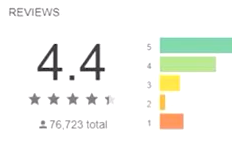

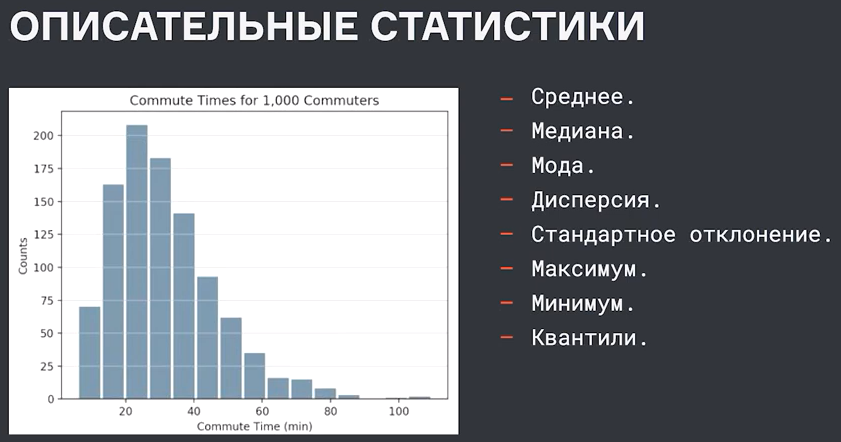

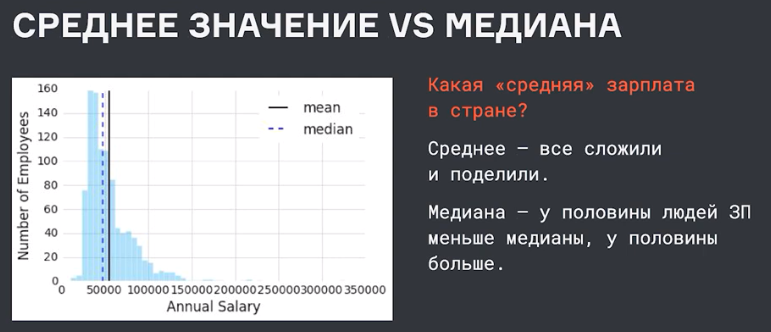

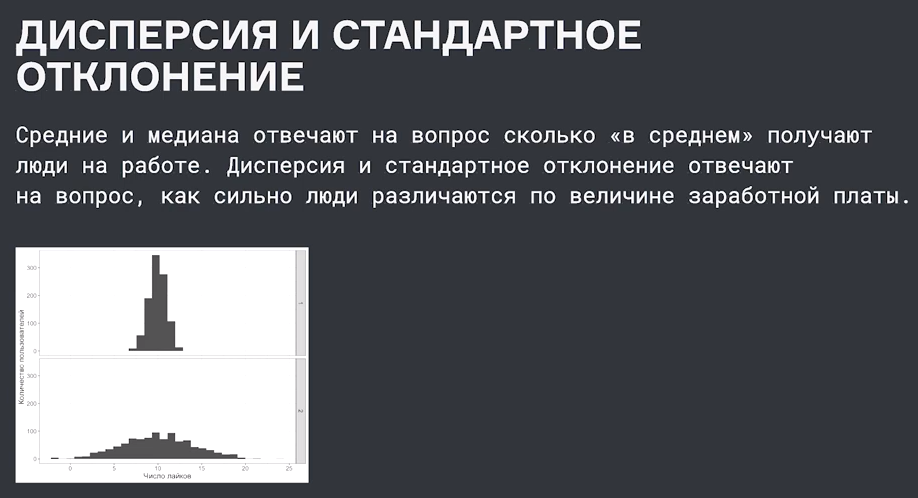

Как избавиться от минусов если среднее отклонение = 0 ? 
- Возвести число в квадрат.

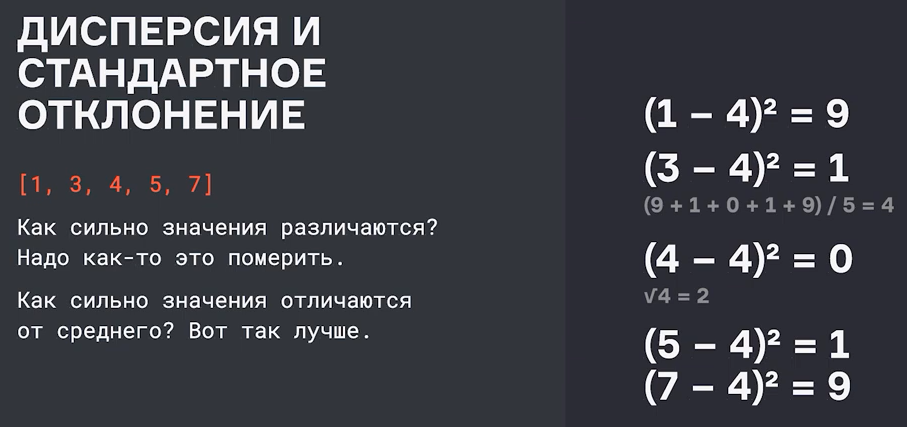

получится 4. **4** - ***это дисперсия***. и если взять корень то получится **2** - это **стандартное отклонение**. ведь мы изначально возвели все в квадрат.

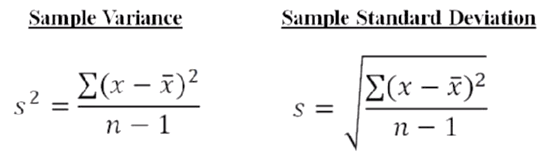

- x - элемент выборки
- _x = среднее
- (n-1) - количество наблюдений

дисперсия выборки и гс

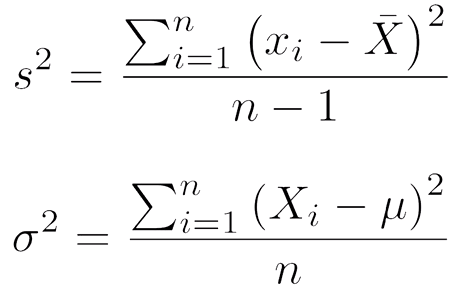

**Количественные** – измеренные значения некоторого признака.

- непрерывные – могут принимать любое значение на определенном промежутке. *Пример:* рост человека
- дискретные – могут принимать определенные значения. *Пример:* число детей в семье (целые неотрицательные числа, то есть 3.5 ребенка быть не может)

**Качественные** (номинативные / категориальные) – делят наши объекты на группы. *Пример:* кодировка пола человека (0 - мужчина, 1 женщина)

Также переменные могут быть **ранговыми**, например, когда мы смотрим на результаты марафона: 1 – прибежал первым, 2 – вторым и так далее. Мы не знаем, насколько различаются результаты участников между собой, но знаем их порядок.

Важно отметить, что некоторые переменные, в зависимости от того, в какой шкале они представлены, могут относиться к разным категориям. Одним из таких примеров является переменная возраста.

Количественная непрерывная - возраст, измеренный в днях/месяцах/годах

Ранговая переменная - возраст разбит на группы (очень часто встречается в анкетировании) - от 14-17 лет; 18-29 лет и так далее.

#### Меры центральной тенденции

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
df = pd.DataFrame()

# Мода (mode) – значение измеряемого признака, которое встречается максимально часто. Мод может быть несколько.
df.column_1.mode()  # pandas way
stats.mode(df.column_1)  # scipy way

# Медиана (median) – значение признака, которое делит упорядоченное множество данных пополам. Берем множество значений признака, сортируем и берем центральное значение.
df.column_1.median()  # pandas way
np.median(df.column_1)  # numpy way

# Среднее (mean, среднее арифметическое) – сумма всех значений измеренного признака, деленная на количество измеренных значений.

#### Когда не стоит использовать среднее значение, а лучше брать моду или медиану:

- явная ассиметрия
- заметные выбросы
- несколько мод

#### Меры изменчивости

Размах (range) – разность между максимальным и минимальным значением из распределения
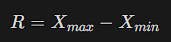

- **Минусы:** размах характеризует распределение, используя только 2 значения. Так что если в данных появится аутлаер (выброс), то данные сильно изменятся. Поэтому лучше использовать каждое значение для оценки изменчивости.

In [ ]:
np.percentile(df.A, [0, 100])

Дисперсия (variance) – средний квадрат отклонений индивидуальных значений признака от их средней величины. (выборки/ген.совокупности)

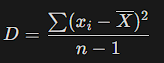
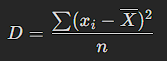

In [ ]:
df.A.var()  # pandas way

import numpy as np
np.var(df.A)  # numpy way

Среднеквадратическое (стандартное) отклонение – квадратный корень из дисперсии.
(ген/выбоки)

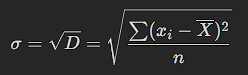
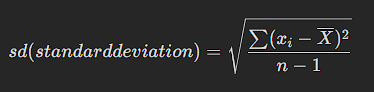

Показывает реальную среднюю разницу каждого значения и среднего в выборке. Дисперсия же отражает квадрат этой разницы.

In [ ]:
df.A.std()  # pandas way
import numpy as np
np.std(df.A)  # numpy way

Свойства дисперсии и стандартного отклонения:


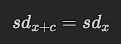

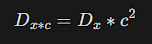
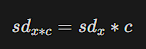

Можно на этой картинке запомнить как считать, и что представляет собой среднеквадратичное отклонение. 

Правда, на картинке есть неточность: σ - это стандартное отклонение в генеральной совокупности, а формула здесь для выборки. Правильнее было бы написать $s_x$.

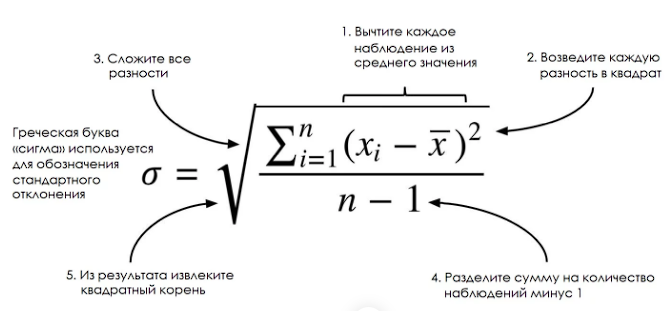

#### Квантили распределения
**Квантили распределения** – значения признака, делящие распределение на некоторое число равных частей.

**Квартили** – три точки (значения признака), которые делят упорядоченное множество данных на 4 равных части.

In [ ]:
df.quantile(q=0.75)
# Также в q можно передать список всех желаемых перцентилей
df.quantile(q=[0.5, 0.7])

#### Боксплот (график)
Межквартильный размах (IQR) – разница между $Q_1 $и $Q_3$. Чем больше межквартильный размах – тем шире "ящик".
- Усы боксплота = ***1.5*** * ***IQR*** (полтора межквартильных расстояния).
- Значения, лежащие за усами, обозначаются жирными точками.

In [ ]:
import seaborn as sns
sns.boxplot(df.A)

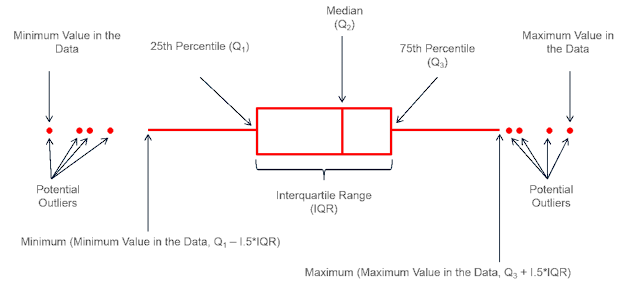

In [ ]:
ax = sns.boxplot(df.A)
ax = sns.swarmplot(df.A)

> Однако боксплот может редуцировать информацию из-за того, что распределение может быть бимодальным или полимодальным. Поэтому лучше на боксплоте отражать ещё и наблюдения из выборки в виде точек.

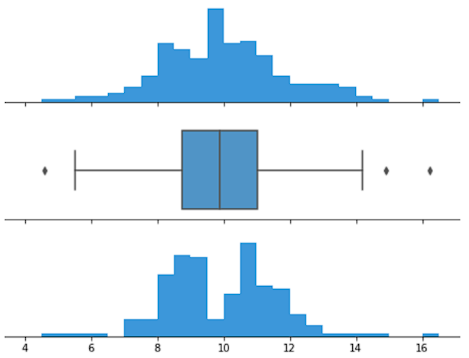

# 2. Нормальное распределение

1. Унимодально
2. Симметрично
3. Отклонения подчиняются закону

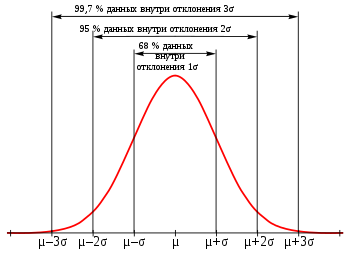

***Стандартизация (Z-преобразование)*** – преобразование, которое позволяет любую
шкалу перевести в стандартную Z-шкалу (Z-scores), 
- где среднее значение будет равно нулю, а 
- стандартное отклонение – равняться 1 ( M(z) = 0, D(z) = 1 ).
- Форма распределения при этом не изменится.


Как далеко отклонилась точка от среднего? например если: 
- M(среднее) = 10, 
- sd(с.о.) = 2, 
- x(1) = 13,4
> z(1) = (13,4 - 10) / 2 = 1,7

- z говорит о том, сколько стандартных отклонений лежит между средним и точкой, в данном случае, точка x(1) = 13 лежит на 1.7 стандартном отклонении(o)

Таким образом, если мы из каждого наблюдения в нашей выборке отнимем
среднее значение и разделим выражение на стандартное отклонение, то получим
Z-шкалу, где новое среднее станет равно нулю, а дисперсия – единице

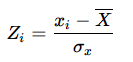

In [ ]:
from scipy.stats import zscore
zscore(df.A)


#### Правило "двух" и "трех" сигм

[gallery.shinyapps.io/dist_calc/](https://gallery.shinyapps.io/dist_calc/)

Пример: Среднее значение равняется 150, а стандартное отклонение равно 8.

Какой процент наблюдений превосходит значение, равное 154?
- Для этого нужно сделать Z-преобразование. Как найти интересующее нас Z - значение? Из 154 нужно вычесть среднее значение по нашей выборке и разделить
на стандартное отклонение (8). В результате:

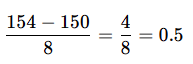

- По вертикали находятся целые и десятичные доли z-значения
- По горизонтали - сотые доли
- Нужный процент находится на пересечении этих элементов z-значения.
    - Например, если у нас получилось z-значение, равное 0.93, то нужный процент будет в строчке 0.9 и  столбце 0.03 (.17619)
- Так как нормальное распределение симметрично, то знак z-значения не принципиален. Таблица ниже даёт одинаковые результаты как для отрицательных, так и для положительных z-значений.

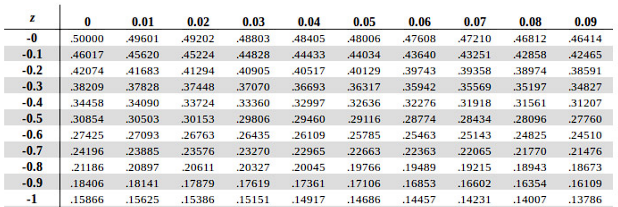

> В нашем случае видим, что в диапазоне превышающем 154 (или 0.5 в z-шкале),
находится примерно 30% наших наблюдений. Иными словами, вероятность
встретить значение, превосходящее 0.5 в z-шкале, составляет  три десятых.

#### Центральная предельная теорема

[gallery.shinyapps.io/CLT_mean/](https://gallery.shinyapps.io/CLT_mean/)

***Центральная предельная теорема (ЦПТ)*** утверждает, что при суммировании большого количества независимых и одинаково распределенных случайных величин их сумма стремится к нормальному распределению, независимо от исходного распределения этих случайных величин.

> Например, если взять большое количество бросков кубика и посчитать сумму значений на каждом броске, ЦПТ утверждает, что распределение сумм этих значений будет приближаться к нормальному распределению, даже если само распределение результатов бросков кубика не является нормальным.

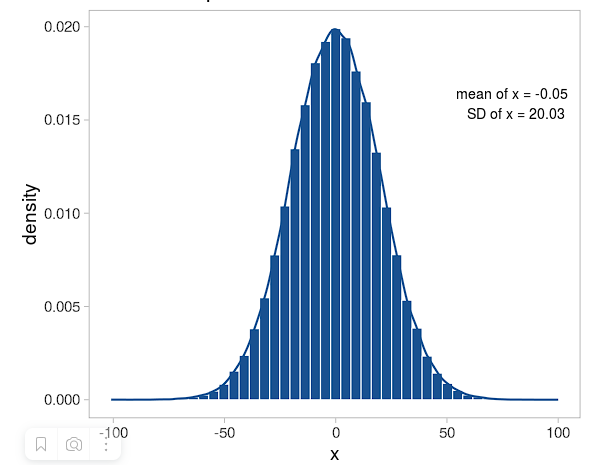

Выбираем из выборки, много(300) маленьких выборок из 50 элементов.

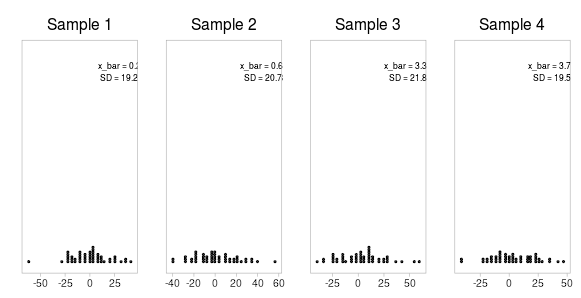

Затем выбираем каждое среднее из выборок и строим распределение

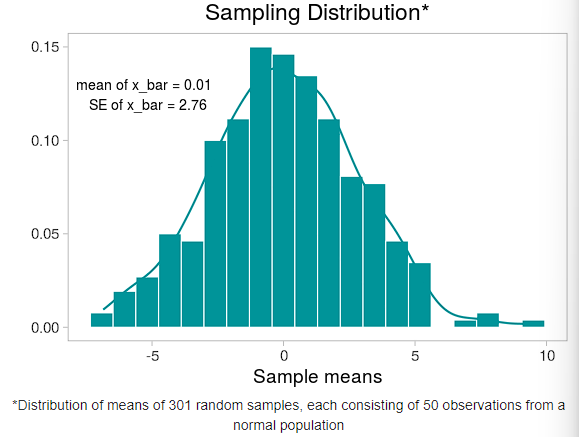

- Чем больше дисперсия у ГС, тем больше дисперсия у распределения выборочных средних
- Распределение выборочных средних стремится к нормальнальному распределению
- Стандартная ошибка среднего это стандартное отклонение, просто оно называется так когда описываем график выборочных средних. Она показывает, насколько выборочные средние отклоняются от
среднего ГС.

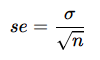

- Если выборка репрезентативна и число наблюдений n ≥ 30, то в качестве стандартного отклонения ГС мы можем использовать стандартное отклонение нашей выборки:

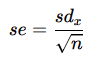

In [ ]:
# Как посчитать
df.A.sem()
stats.sem(df.A)

#### Доверительные интервалы для среднего

Если мы имеем некоторую выборку и ГС, то мы **не можем точно** знать среднюю ГС, зная только среднее выборки. Однако **мы можем сказать, с некоторым процентом уверенности**, в каком интервале лежит средняя ГС. Понятно дело, что для нас лучше, чтобы этот интервал был как можно меньше, как это сделать?

Мы знаем, средняя средних выборок, стремится к средней ГС, также мы знаем, что стандартная ошибка среднего описывает стандартное отклонение распределения средних выборок. Если мы возьмём случайную выборку $X$ и найдём её среднее $\bar{X}$, а также вычислим стандартную ошибку $se$, то мы можем вычислить доверительный интевал $[\bar{X} - 1.96*se; \bar{X} + 1.96*se]$ который описывает среднюю ГС с некотором интервале с 95% доверия.

Загадочное число **1,96** это количество сигм $\sigma$ в нормальном распределение, необходимые, чтобы охватить **95%** значений в этом распределнии

 - <font color='grey'>Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.</font>
 - <font color='grey'>Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.</font>

In [1]:
'''Вычисление 1.96 c помощью scipy'''
from scipy import stats

# 95%
p = 0.95
# так как у нас двухсторонний интервал, сделаем вычисление
alpha = (1-p)/2
# isf - Inverse survival function (inverse of sf) 
print(f'{stats.norm().isf(alpha):.2f} sigma')

1.96 sigma


In [2]:
'''Рассчитайте 99% доверительный интервал для следующего примера: 
среднее = 10, стандартное отклонение = 5, размер выборки = 100
'''
from numpy import sqrt
from scipy import stats

p = 0.99
mean = 10
std = 5
n = 100

se = std/sqrt(n)
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)
сonfidence_interval = mean - sigma*se, mean + sigma*se
print('[%.2f; %.2f]' % сonfidence_interval)

[8.71; 11.29]


#### p-value:
***p-value (уровень значимости)*** - это вероятность получить такие же или более экстремальные результаты, чем наблюдаемые, при условии, что нулевая гипотеза верна.

Правила:

1. Чем меньше p-value, тем сильнее доказательства против нулевой гипотезы.
2. p-value < уровень значимости (обычно 0.05): это обычно считается статистически значимым, и мы отвергаем нулевую гипотезу.
3. p-value >= уровень значимости: это означает, что у нас недостаточно доказательств для отвержения нулевой гипотезы.

Свойства:

1. Не зависит от размера выборки: p-value зависит от степени отклонения данных от нулевой гипотезы, но не от размера выборки.
2. Чувствительность к альтернативной гипотезе: p-value может изменяться в зависимости от конкретной альтернативной гипотезы.
3. Не является вероятностью гипотезы: p-value не предоставляет вероятность истинности или ложности гипотезы, а лишь оценивает согласованность данных с нулевой гипотезой.


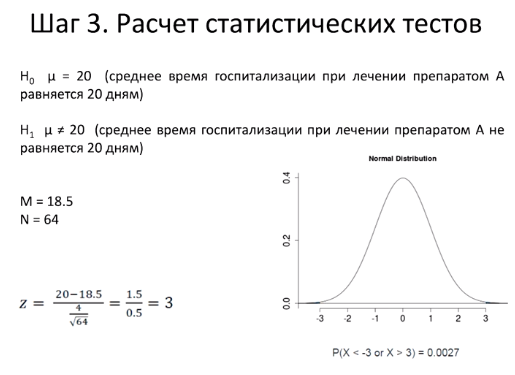

> <font color='white'>смотрим как далеко уходит среднее значение новой выборки от средней выборочных средних. это значение равно 3 сигмы вправо или влево. вероятность такого события равноа 0.0027 что очень редко. тем самым p = 0.0027 мы выбираем альтернативную гипотезу.</font>

In [3]:
from scipy.stats import norm

mean = 173  # Среднее значение роста
std_dev = 11  # Стандартное отклонение роста

lower_height = 181
upper_height = 192

# Вычисление z-оценок для нижней и верхней границ интервала
z_lower = (lower_height - mean) / std_dev
z_upper = (upper_height - mean) / std_dev

# Вычисление вероятностей для нижней и верхней границ интервала
probability_lower = norm.cdf(z_lower)
probability_upper = norm.cdf(z_upper)

# Вычисление процента студентов на интервале от 181 до 192
percentage_students = (probability_upper - probability_lower) * 100

# Округление до целого процента
rounded_percentage = round(percentage_students)

print(f"Примерно {rounded_percentage}% студентов имеют рост от 181 до 192.")


Примерно 19% студентов имеют рост от 181 до 192.


# 3. Доверительный интервал и ошибки 1,2 рода

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mu = 100
sigma = 10

# создаем генеральную совокупность, где среднее = 100 а sd = 10
population = np.random.normal(mu,sigma,100000)

# размер выборки
sample_size = 30


pop_mean = population.mean().round(2)
pop_std = population.std().round(2)
print(f'mean : {pop_mean}, stand.dev: {pop_std}')

mean : 99.96, stand.dev: 9.99


<Axes: ylabel='Count'>

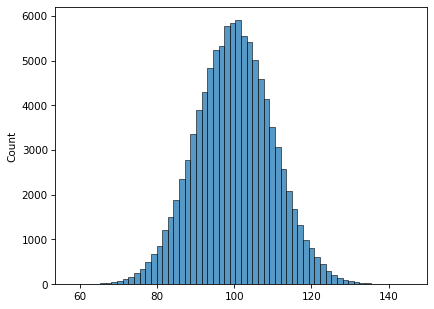

In [86]:
plt.figure(dpi=75)
sns.histplot(population, kde = False, bins = 60)

In [87]:
# создаем массив средних из выборок по 30 элементов
sample_means = []
for i in range(1000):
    s = np.random.choice(population, sample_size, False)
    sample_means.append(s.mean())

smp_mean = np.mean(sample_means).round(2)
smp_std = np.std(sample_means).round(2)
print(f'mean : {smp_mean}, stand.dev: {smp_std}')

mean : 99.92, stand.dev: 1.82


<Axes: ylabel='Count'>

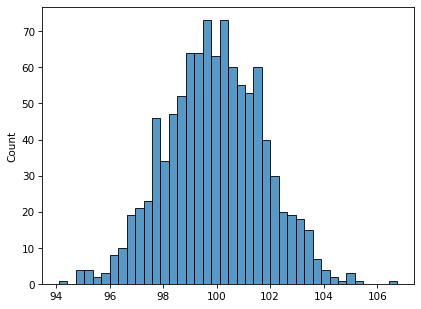

In [93]:
plt.figure(dpi=75)
sns.histplot(sample_means, kde = False, bins = 40)

In [88]:
# есть правило трех сигм
# есть правило 1.96 сигм - 95% в этом диапазоне
# se = sigma / sqrt(n)

se = population.std() / sample_size ** 0.5
# стандартное отклонение ген совокупности
# 1.8195983034895735
# стандартное отклонение выборки
# 1.8309225173419112

In [96]:
# левый и правый край диапазона ген совокупности
population.mean() + 1.96 * se
population.mean() - 1.96 * se
# в этом диапазоне может находится средняя гс
[96.37,103.54]

[96.37, 103.54]

In [98]:
sample_real = np.random.choice(population,sample_size, False)
sample_real.mean()

98.24255890345285

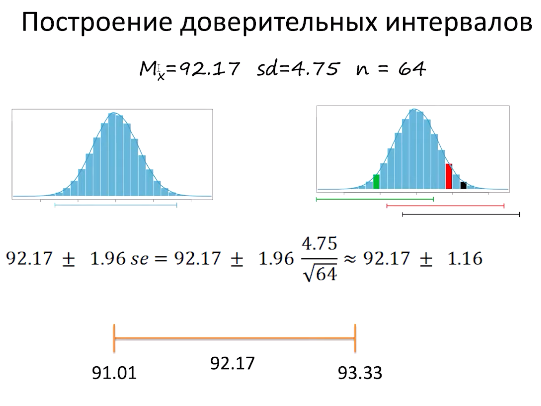

Карпов говорит, что когда мы получим среднее из нашей выборки, и на основе этого мы строим Доверительный интервал= Среднее ±1.96× sd / (Размер выборки)^0.5, то в 95% случаев в этом интервале будет находится среднее генеральной совокупности


In [102]:
# стандартная ошибка ГС
population.std() / sample_size ** 0.5

1.8243956550676959

In [101]:
# se = sd / корень(n) - подставляем sd(выборки), другого ничего нет
se = sample_real.std() / sample_size ** 0.5
se

1.5928047049799998

In [103]:
sample_real.mean() + 1.96 * se

101.36445612521365

In [104]:
sample_real.mean() - 1.96 * se

95.12066168169204

Если выбран уровень доверия 95%, это означает, что в 95% случаев ваш интервал будет содержать истинное значение параметра. Это хороший выбор, когда точность важна, но абсолютная уверенность не требуется.

В случае 99% уровня доверия интервал будет шире, так как он предполагает большую уверенность в том, что захватывает истинное значение параметра. Это полезно в ситуациях, когда важна высокая уверенность в правильности оценки, даже за счет большей ширины интервала.

### Пример Использования

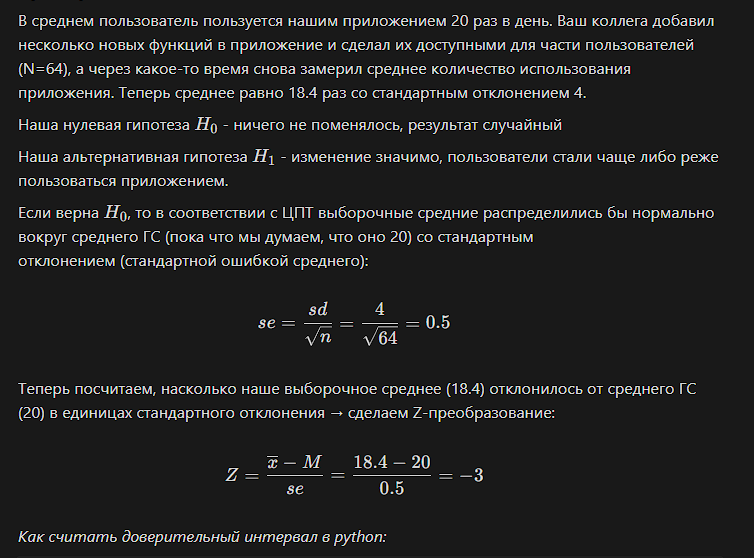

In [ ]:
import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms

a = range(100)

# первый способ
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

# второй способ
sms.DescrStatsW(a).tconfint_mean()

Теперь считаем вероятность такого (-3 или 3) или еще более сильного отклонения (>-3 или 3<) с помощью [сайта](https://gallery.shinyapps.io/dist_calc/). Получаем p = 0.0027 (p-уровень значимости).

Чем меньше p-значение, тем больше оснований отклонить нулевую гипотезу. Классические пороги для отклонения нулевой гипотезы равны 0.05 или 0.01 (более строгий вариант). Но не везде: есть области, где требуются более строгие отсечки. Например, генетика ассоциаций SNP (однонуклеотидная замена) с заболеваниями, где пороговое значение равно $10^{-7}$. Поэтому важно понимать, в какой области мы проводим статистический тест, чтобы брать соответствующие пороговые р-значения.

Вывод: в нашем случае коллега статистически значимо ухудшил приложение и мы попросим его не распространять эту версию приложения на всех пользователей. То есть в нашем случае, если коллега все-таки не испортил приложение и такой результат (уменьшение использования приложения) является случайным, то вероятность этого события равна 0.27%.

*Важно:*

- p-уровень значимости не говорит о силе эффекта (напр., пользователи стали пользоваться приложением меньше в 3 или 1.1 раза)
- Если получили уровень значимости выше порога – это не значит, что нулевая гипотеза верна. Просто такой уровень значимости не позволяет нам её отклонить.

## Ошибки первого и второго рода

**Ошибка 1 рода (False positive):** отклонили нулевую гипотезу, хотя она была верна (сказали, что есть эффект, когда на деле его нет, false alarm)

**Ошибка 2 рода (False negative):** не отклонили нулевую гипотезу, хотя верна была альтернативная (говорим, что нет эффекта, когда на самом деле он есть)

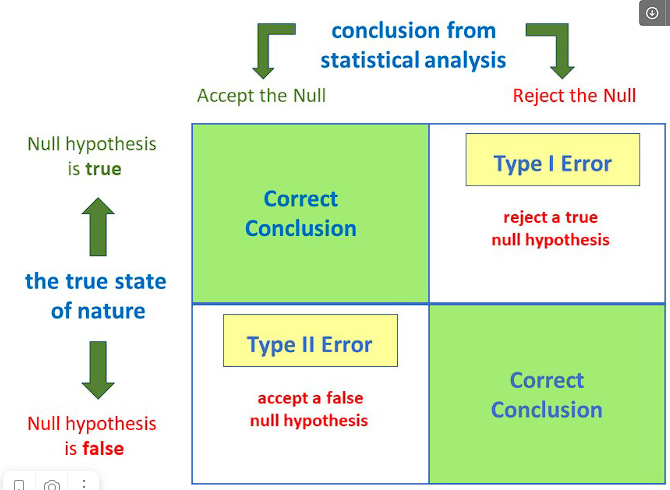

Может помочь с запоминанием:

- False **P**ositive → "**п**" → первый → ошибка первого рода,
- False n**E**gative → s**E**cond → ошибка второго рода (либо через second, либо методом исключения)

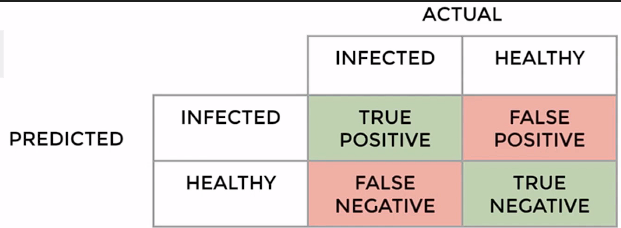

# 4. Cравнение средних

### Теория

In [ ]:
# Вычисление стандартного отклонения
std_dev = (df['column_name'] - df['column_name'].mean()).pow(2).sum() / (len(df) - 1)
std_dev = std_dev ** 0.5
# или df['column_name'].std()

# Для столбца 'column_name'
# Стандартная ошибка среднего вычисляется как стандартное отклонение, деленное на квадратный корень из числа наблюдений (обычно размера выборки).
n = len(df['column_name'])  # Размер выборки
std_error_mean = df['column_name'].std() / (n ** 0.5)

# доверительный интервал
df['column_name'].mean() +- 1.96 * std_error_mean

# 
t_score = ( df['column_name'].mean() - std_dev) / std_error_mean

- Если у нас есть ГС, со средним = 0 и стандартных отклонением = 1
- Если мы многократно извлекаем выборки из ГС, то все средние значения этих выборок распределятся нормальным образом вокруг среднего ГС
- со стандартным отклонением (стандартной ошибкой среднего), которую можно рассчитать разделив стандартное отклонение ГС на корень из числа наблюдений:

    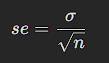

- Это удобно до тех пор, пока у нас есть большое количество наблюдений. 
- В таком случае стандартное отклонение по выборке хорошо описывает соответствующие параметры генеральной совокупности, что позволяет преобразовать формулу в 

    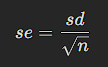

sd = sqrt((Σ(xi - x̄)²) / (n - 1))

Где:
- sd - стандартное отклонение выборки.
- xi - каждое отдельное значение в выборке.
- x̄ - среднее значение выборки.
- n - количество наблюдений в выборке.

И именно при большом количестве наблюдений все выборочные средние будут вести себя в соответствии с нормальным распределением.

Все становится интересней, когда кол-во наблюдений не так велико (особенно важно, когда оно меньше 30). В таком случае:
- стандартное отклонение по выборке – не самый хороший показатель соответствующих параметров ГС
- нарушается предположение о том что все выборочные средние будут вести себя в соответствии с нормальным законом

> Чем меньше выборка, тем больше довольно сильных отклонений мы будем получать от среднего ГС

#### Распределение Стьюдента (Т-распределение)

Если число наблюдений в выборке невелико и $\sigma$(стандартное отклонение генеральной совокупности) неизвестно (почти всегда), используется распределение Стьюдента (T-distribution), чтобы описать, как будут себя вести все выборочные средние.

- Унимодально
- Симметрично
- Но: наблюдения с большей вероятностью попадают за пределы ±2*σ* от M

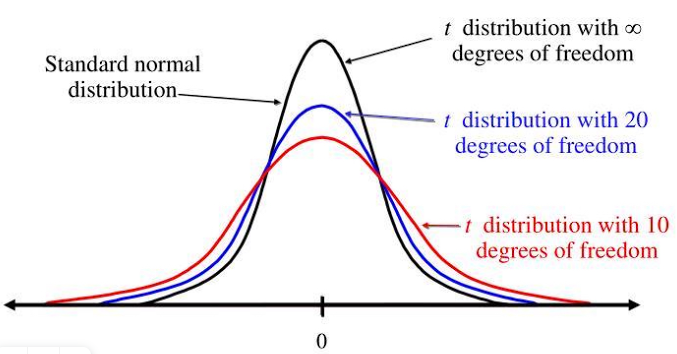

Посмотрим на отличия от нормального распределения более подробно:
- у распределения Стьюдента более "высокие" хвосты распределения. Это означает, что в диапазоне, превышающем 2 стандартных отклонения вправо будет лежать больше наблюдений, чем у норм распределения, и аналогично – в диапазоне минус 2 стандартных отклонения будут чаще встречаться такие сильно выраженные отклонения от среднего ГС.

Важный параметр распределения Стьюдента: число степеней свободы. Оно зависит от количества наблюдений в нашей выборке. Так:

- Чем больше степеней свободы и чем больше наблюдений, тем всё больше распределение становится похожим на нормальное

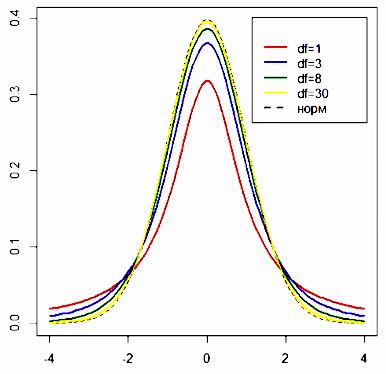

Например, всего два наблюдения:

- $df = n - 1 = 2 - 1 = 1$
- Красное распределение имеет очень высокие хвосты в левой и правой части
- В диапазоне от 2 до 4 ст. отклонений будем иметь довольно большой процент наблюдений
- Выборочные средние будут очень далеко отклоняться от реального среднего в ГС

- По мере добавления большего кол-ва наблюдений в выборку, распределение Стьюдента начинает потихоньку подбираться к нормальному, и наблюдается всё меньше сильных отклонений.
-  например, возьмем выборку из 31 наблюдения: видим, что в такой ситуации Т-распределение с 30 степенями свободы очень близко подобралось к реальному нормальному распределению. При этом мы замечаем, что хвосты распределения будут расположены чуть выше, чем у нормального распределения. В этой ситуации сильное отклонение от среднего мы будем получать чаще, чем в ситуации когда распределение абсолютно нормально.
- В отличие от нормального распределения, где отклонение от среднего строго регламентировано, форма Т-распределения будет изменяться в зависимости от числа степеней свободы. Получить довольно экстремальные отклонения от среднего значения будет более или менее вероятно в зависимости от того, какая большая выборка по объему.

Предположим, что в ГС $μ=10$, а в выборке $\bar{X} = 10.8, sd=2, N=25$. 
- Если бы мы использовали стандартную формулу, то сказали бы, что в соответствии с ЦПТ, все выборочные средние распределились бы нормально вокруг среднего ГС. 
- Стандартную ошибку среднего (ст. отклонение этого распределения) мы могли бы рассчитать, разделив ст. отклонение выборки на корень из числа элементов:

    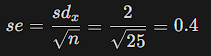

Найдем Z-значение:

- Из нашего среднего вычтем среднее ГС
- Разделим на стандартное отклонение распределения всех выборочных средних

    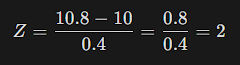

Мы получили отклонение от предполагаемого среднего на 2 стандартных отклонения вправо. Найдем вероятность получить такое или более выраженное отклонение.
https://gallery.shinyapps.io/dist_calc/

- Если мы допустили, что все выборочные средние будут распределены нормальным образом, то вероятность получить отклонения, превышающие 2σ, как в левую, так и в правую стороны, составит 0.0455
- Это означает, что р-уровень значимости будет меньше, чем 0.05. Мы можем отклонить $H_0$, согласно которой наша выборка принадлежит ГС со средним 10.

Но: при небольшом объеме выборки распределение выборочных средних будет отличаться от нормального, и вероятность получить более выраженное отклонение от среднего станет выше. 
- Рассчитаем данную вероятность, если мы предположим, что мы работаем с т-распределением, и т.к. у нас 25 элементов в выборке, то df=24 степени свободы.
-  В этом случае получить отклонение на 2 сигмы в ту или иную сторону составит уже 0.0569.
- А значит, что если бы мы пользовались т-распределением, то Н0 отклонить мы бы уже не смогли.

Т-критерий рассчитывается как и Z-значения:

- Из выборочного среднего вычитаем среднее ГС
- Делим на стандартное отклонение выборки, деленное на корень из N

Однако, если бы мы в этом случае получили 2, то в Т-распределении с 24 степенями свободы р-уровень значимости составил бы уже 0.056, и $H_0$ мы бы не смогли отклонить.

   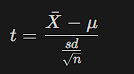

> В лекциях было сказано, что мы используем T-распределение в ситуации небольшого объема выборки. Необходимо более подробно пояснить, зачем это нужно.

> Вернемся к предельной центральной теореме, мы уже узнали, что если некий признак в генеральной совокупности распределен нормально со средним μ и стандартным отклонением σ, и мы будем многократно извлекать выборки одинакового размера n, и для каждой выборки рассчитывать, как далеко выборочное среднее$ \bar{X}$ отклонилось от среднего в генеральной совокупности в единицах стандартной ошибки среднего:

   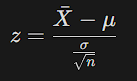

> то эта величина z будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице.

для расчета стандартной ошибки мы используем - σ. на практике σ нам практически никогда не известна, и для расчета стандартной ошибки мы используем выборочное se.

> в таком случае распределение отклонения выборочного среднего и среднего в генеральной совокупности, деленного на стандартную ошибку, теперь будет описываться именно при помощи t - распределения.

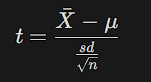

Таким образом, в случае неизвестной σ мы всегда будем иметь дело с t-распределением. На этом этапе вы должны с негодованием спросить, почему же мы применяли z - критерий в первых уроках для проверки гипотез, используя выборочное стандартное отклонение?

- Мы уже знаем, что при довольно большом объеме выборки (обычно в учебниках приводится правило, n > 30) t - распределение совсем близко подбирается к нормальному распределению:

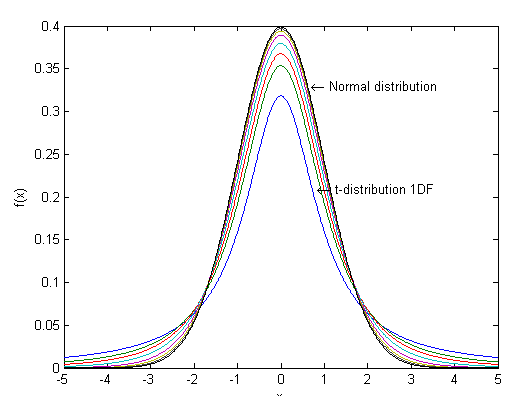

> правильнее будет сказать, что мы используем t - распределение не потому что у нас маленькие выборки, а потому что мы не знаем стандартное отклонение в генеральной совокупности. Поэтому в дальнейшем стоит использовать t - распределение для проверки гипотез, если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки, даже если объем выборки больше 30.

### Понятие числа степеней свободы
- Число степеней свободы – количество элементов, которые могут варьироваться
при расчете некоторого статистического показателя
- Например: если у нас есть 10 наблюдений и мы знаем среднее значение по этим 10 наблюдениям, то нам достаточно знать среднее и только 9 из них, чтобы узнать, чему равен 10 оставшийся элемент. Т.е. у него нет никакой возможности варьировать свои значения.
- В случае Т-распределения зависит от количества наблюдений

> , важно учитывать как много независимых элементов мы используем для того, чтобы получить это значение. В статистике в большинстве методов всегда будет указываться число степеней свободы. В большинстве случаев это будет связано именно с размером выборки (как много элементов в нашей выборки позволили нам сделать оценку того или иного статистического параметра).

https://habr.com/ru/company/stepic/blog/311354/

### Сравнение двух средних
Критерий, который позволяет сравнивать две выборки между собой(средние), называется парный t-тест,  или просто t-критерий Стьюдента.


Гипотезы:
- (H0) в генеральной совокупности никакого различия между средними значениями нет
- (H1) средние в генеральной совокупности не равны (альтернативная гипотеза)

- **Нулевая гипотеза:** Предполагаем, что средние в генеральной совокупности равны.
Эксперименты и выборки: Повторяя эксперименты с выборками, сравниваем средние значения, получаем разности между ними.
- **Стандартная ошибка:** Отражает вариативность разности и зависит от стандартных отклонений и размеров выборок.
- **Центральная Предельная Теорема:** При большом количестве наблюдений разность средних имеет нормальное распределение.
- **Степени свободы:** (n - 1) Рассчитываем по формуле для т-распределения, помогают оценить вероятность отклонения разности средних при верной нулевой гипотезе.

**Цель т-теста:** Определить, насколько средние двух групп различаются, если предположить, что они одинаковы в генеральной совокупности.
- **Формула t-статистики:** t = (Среднее группы 1 - Среднее группы 2) / (Стандартная ошибка)
Получаем p-значение: Рассчитываем t-значение и, зная число степеней свободы, определяем вероятность получить такое или большее различие между средними, если нулевая гипотеза верна.
- **Условия для применения т-теста:**
    - Гомогенность дисперсий: Дисперсии внутри групп должны быть примерно одинаковыми. Это проверяется с помощью критериев Левена или Фишера.
    - Нормальность данных: Важно, чтобы данные в обеих группах имели нормальное распределение. Это обеспечивает более точные результаты.
- **Особенности использования т-теста:** На практике т-тест может применяться и к ненормальным данным, особенно на больших выборках без явных выбросов. Однако, важно помнить, что это может быть рискованным, и иногда более подходящими могут быть непараметрические тесты или бутстрэп. Также, преобразование данных (например, логарифмирование) может сделать распределение более симметричным и улучшить результаты теста.

**Тесты** для проверки нормальности распределения:
- Тест Колмогорова-Смирнова:
- **Тест Шапиро-Уилка:** Проверяют гипотезу о том, что выборка изъята из генеральной совокупности, где распределение признака соответствует нормальному. Здесь мы как раз хотим получить р-уровень значимости больше 0.05, поскольку если он меньше, то новость плохая: мы тестируем гипотезу о том, что распределения значимо не отличаются от нормального, поэтому отклонять H0 мы не хотим.

In [ ]:
from scipy import stats
stats.shapiro(x)

### Выбросы и U-критерий Манна-Уитни
Почему отклонения от нормального распределения могут негативно повлиять на
результаты исследования?

Всего два выброса уничтожат все значимые результаты: Т-критерий Стьюдента скажет, что вероятность получить такие или еще более выраженные различия составит 97%, нулевую гипотезу мы отклонить не сможем.
- t = 0.03, p = 0.97

Если распределение признака отличается от нормального, можно использовать **непараметрический аналог – U-критерий Манна-Уитни**. Он переводит все данные в ранговую шкалу (ранжирует показатели температуры от 1 до последнего), после этого считает какой средний ранг оказался в первой группе и какой во второй. Этот
критерий менее чувствителен к экстремальным отклонениям от нормальности и наличию выбросов. С его помощью в данном случае мы бы получили **p=0.09**, что тоже поставило бы под вопрос отклонение  , но явно лучше, чем p=0.97. 

# 5. Дисперсионный анализ

Когда групп становится больше двух, t-критерий перестаёт быть нам полезен. Для таких случаев был создан дисперсионный анализ – он выполняет ту же функцию, но подходит для числа групп больше двух.

## Однофакторный дисперсионный анализ

Допустим, нам захотелось сравнить между собой аж три выборочных средних $X_1$, $X_2$ и $X_3$.

**Гипотезы:**

- **$H_0$** – ни одно из выборочных средних не отличается от другого (нет различий)
- **$H_1$** – **хотя бы одно** выборочное среднее отличается от других (есть различия как минимум между двумя группами)

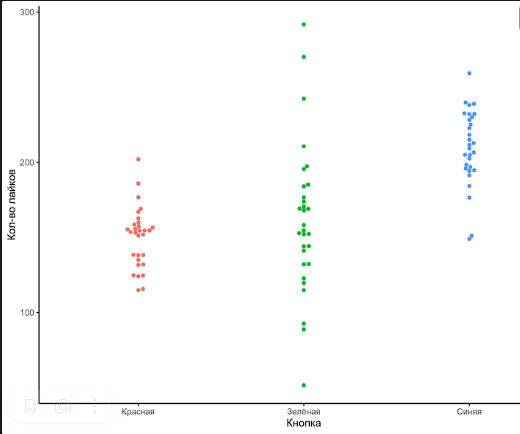

Кроме **выборочных средних**, мы будем работать со **средним всех наблюдений** - то есть мы рассчитываем среднее не только для каждой группы, но и среднее по всем группам сразу. 

Отметим его как $\overline{X}$.

После этого мы считаем SST – мы просто вычитаем из среднего всех наблюдений каждое индивидуальное наблюдение, разницу возводим в квадрат и суммируем все квадраты разниц. 

**SST** - общая сумма квадратов(total sum of squares)

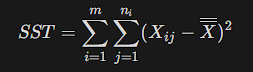
- $m$ - количество групп
- $n_i$ - размер группы под номером $i$
- $X_{ij}$ - наблюдение под номером $j$ из группы $i$ (индивидуальное наблюдение)
- $\overline{\overline{X}}$ - среднее всех наблюдений
- $\sum$ - знак суммы

Таким образом, у нас получилась мера того, насколько сильно наблюдения отклоняются друг от друга и это можно считать аналогом дисперсии.

Кроме этой величины, надо посчитать ее **степени свободы**.
- Так как с ростом выборки, будет расти SST тоже, а нам надо, чтобы это зависело только от изменчивости в самих данных.

**Количество степеней свободы для SST** - это количество наблюдений (N) - 1:

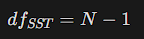

**SST** складывается из двух разных источников изменчиовсти:
- **SSW** - внутригрупповая сумма квадратов (sum of squares within groups)
    - индивидуальные данные могут различасться между собой в рамках одной группы
- **SSB** -  межгрупповая сумма квадратов (sum of squares between groups)
    - индивидуальные данные могут различаться между несколькими группами

> **SST** = **SSB** + **SSW**

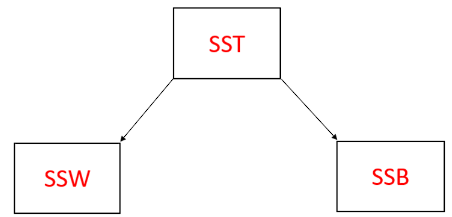

**SSW** считается на основе выборочных средних – мы просто вычитаем из выборочного среднего одной группы каждое индивидуальное значение, возводим каждую разницу в квадрат и вновь суммируем все квадраты разниц между собой (и так для всех групп).

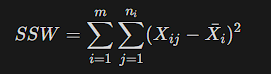

Степени свободы здесь рассчитываются как разница между общим количеством наблюдений (N) и количеством групп (m), то есть: 

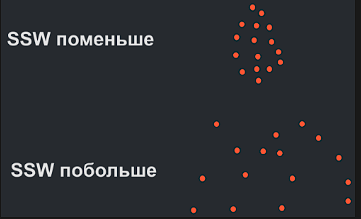

**SSB** мы вычитаем из общего среднего выборочные средние, возводим разницу в квадрат и также суммируем все квадраты разниц.

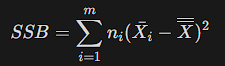

Степени свободы здесь рассчитываются как количество групп (m) минус 1, то есть: 

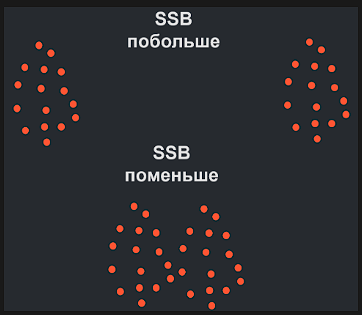

**Что для нас лучше:**
- *SSB было больше SSW. Это будет означать, что значения между группами различаются больше, чем внутри группы => группы значимо различаются между собой.*
-  это выражается через так называемую F-статистику, которая считается по следующей формуле: 
    $$ F = \frac{{\left( \frac{{SSB}}{{df_{SSB}}} \right)}}{{\left( \frac{{SSW}}{{df_{SSW}}} \right)}} $$

**Когда мы предпологаем что нулевая гипотеза верна:**
- SSW было бы каким-то фиксированным значением, а SSB бы стремилось к нулю
- F-статистика бы тоже стремилась к нулю

**Соответсвенно:**
- мы можем проверить, как полученная нами F-статистика соотносится с соответствующим ему F-распределением.
- Зная F-статистику и соответствующее число степеней свободы, мы можем рассчитать соответствующий р-уровень значимости
- мы узнаем, какая вероятность получить такое или еще более выраженное отличие между несколькими средними, если на деле верна нулевая гипотеза:

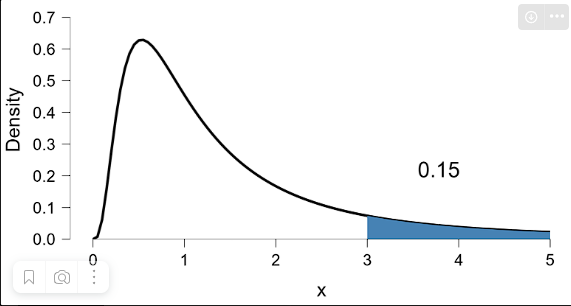

***Дисперсионный анализ проверяет только общую гипотезу о том, что где-то есть различия в выборочных средних. Где они именно – нужно проверять отдельно***

### Требования к дисперсионному анализу
Как и для t-критерия: (sample size, normality, homogeneity of variance)
- **Дисперсии** внутри наших групп должны быть примерно **одинаковы** (требование гомогенности дисперсий). Проверить можно с помощью **критерия Левена** и **критерия Бартлетта**
- Если объемы групп недостаточно большие **(меньше 30)** и не совпадают по размерам, то важно соблюдать требование о **нормальности распределения** выборок.


In [ ]:
from scipy import stats

stats.f_oneway(a, b, c) # a, b, c - переменные с данными трёх групп

# Первое число — F-значение, второе - p-значение.

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols(formula = "зависимая_переменная ~ независимая_переменная", data = данные).fit()
anova_lm(model)

# Здесь p-value отмечено как PR(>F), остальное связано либо с суммами квадратов, либо со степенями свободы.

In [ ]:
import pingouin as pg

pg.anova(data=данные, dv="зависимая_переменная", between="независимая_переменная")

# Важный новый элемент - размер эффекта, в данном случае np2. 
# Он указывает, какая доля всей изменчивости в данных объясняется нашим экспериментальным воздействием.

если группы не обладают равной дисперсией, то можно сделать дисперсионный анализ Уэлча:

In [ ]:
pg.welch_anova(data=данные, dv="зависимая_переменная", between="независимая_переменная")

### Множественные сравнения


- Когда нам нужно сравнивать количество групп больше двух, мы неизбежно сталкиваемся с проблемой множественных сравнений. Это статистический эффект, когда из-за тестирования сразу нескольких гипотез разом вероятность ошибки I рода искусственно возрастает.
- Поэтому при увеличении количества групп необходимость сравнивать попарно каждую из них приводит к повышенной вероятности увидеть значимые различия там, где их нет.
Оценить масштаб бедствия можно с помощью следующей формулы: $$ P = 1 - (1 - \alpha)^2 $$
- α – уровень значимости
- m – количество тестируемых гипотез
- P – итоговая вероятность допущения ошибки I род
- Например: при α = 0.05 и m = 3 вероятность допустить ошибку I рода уже становится 0.143%

Посчитать m, в свою очередь, можно по следующей формуле:
$$ \binom{n}{k} = \frac{n!}{k!(n - k)!} $$
- n - количество групп
-  k - размер комбинации (так как у нас попарные сравнения, то k = 2), ! - факториал числа.

### Поправка Бонферрони

*В рамках этого метода нам нужно разделить уровень значимости на количество попарных сравнений, и считать различия значимыми только в том случае, если p-значение меньше нового порога*

Например: при сравнении 8 групп мы проводим 28 сравнений, и новый уровень значимости становится: 

0.05 / 28 = 0.001828005 = 0.0018

**Проблема метода:**  при достаточно большом количестве попарных сравнений метод становится слишком консервативным: растет вероятность ошибки II рода, и мы уже не можем отвергнуть нулевую гипотезу даже при выраженных различиях между группами.

***рекомендуем заглянуть в документацию pingouin и посмотреть аргумент padjust вот этой [функции Pingouin](https://pingouin-stats.org/build/html/generated/pingouin.ptests.html#pingouin.ptests).***



### Критерий Тьюки

*Фактически рассчитывается по той же формуле, что и t-критерий, но несколько иначе рассчитывается стандартная ошибка*
- в результате критерий Тьюки более консервативен, чем обычный t-критерий, но гораздо менее консервативен по сравнению с поправкой Бонферрони

Как выглядит в python: 

In [ ]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

print(pairwise_tukeyhsd(столбец_с_данными, столбец_с_обозначениями_групп))

In [ ]:
MultiComp = MultiComparison(столбец_с_данными, столбец_с_обозначениями_групп)

print(MultiComp.tukeyhsd().summary())

В обоих случаях появится похожая табличка:

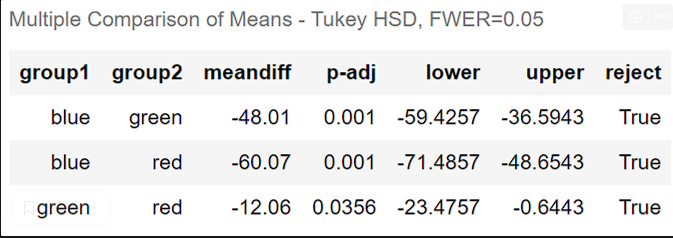

- *group1* и *group2* - названия групп, которые сравниваются в рамках теста
- *meandiff* - разница между значением 2 группы и значением 1 группы
- *p-adj* - скорректированный порог значимости
- *lower* и *upper* - нижняя и верхняя границы доверительного интервала различий в средних
- *reject* - отвергается нулевая гипотеза или нет

*Как видно по последней колонке, все нулевые гипотезы были отклонены, поэтому мы делаем вывод, что средние всех трёх групп значимо различаются.*

Похожий результат будет, если мы используем функцию из **pingouin:**

In [ ]:
pg.pairwise_tukey(data=данные, dv="зависимая_переменная", between="независимая_переменная")

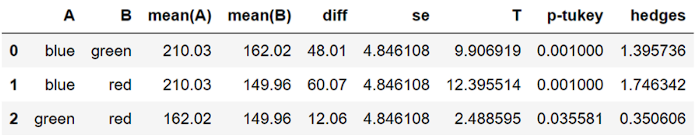

Дополнительный элемент - стандартизованная разница в средних под названием [Hedges G.](https://www.statisticshowto.com/hedges-g/).

***Если наши группы имеют разную дисперсию, то применяется критерий Геймса-Хоувелла:***

In [ ]:
pg.pairwise_gameshowell(data=данные, dv="зависимая_переменная", between="независимая_переменная")

## Anova на практике

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (16,6),'figure.dpi': (75)},style='darkgrid')

from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

post_likes = pd.read_csv('F:\\карпов\\6 СТАТИСТИКА\\5 Anova\\5 post_likes.csv')
post_likes.head()

id button  likes
0  S001    red    160
1  S002    red    150
2  S003    red    150
3  S004    red    150
4  S005    red    187

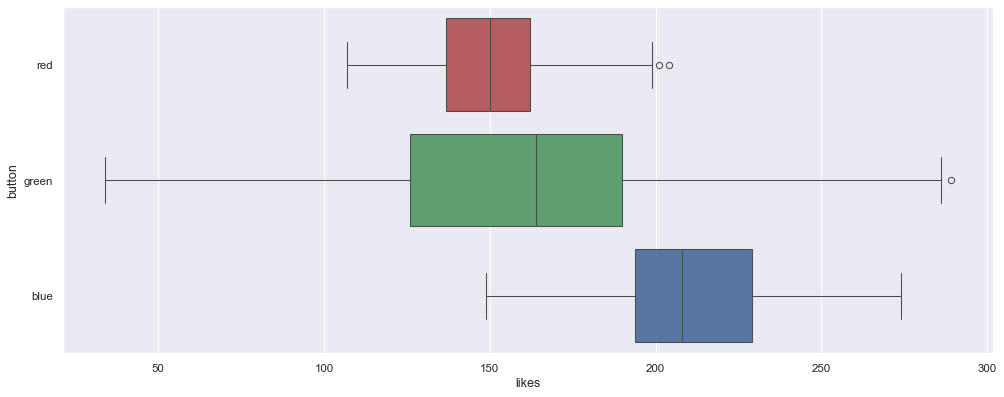

In [16]:
sns.boxplot(x='likes', y= 'button', data = post_likes, hue='button',palette=['r','g','b']);

### три способа посчитать ANOVA

In [21]:
# через scipy
import scipy.stats as ss 
# oneway - однофакторный

red =   post_likes.query('button == "red"').likes
blue =  post_likes.query('button == "blue"').likes
green = post_likes.query('button == "green"').likes
# parametrs: 1 группа, 2 гр. и тд... в виде массива
  
ss.f_oneway(red,green,blue)
# не очень удобно каждый раз создавать новые группу, проблема масштабируемости

F_onewayResult(statistic=85.99631112614011, pvalue=3.437004581021769e-30)

In [23]:
# через statmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm

#formula - способ указать взаимосвязь между элементами
#количественная переменная ~ категориальная, чтобы указать что категор. "C" перед скобками
# обязательно fit() и anova_lm(name model)
model = smf.ols(formula = 'likes ~ C(button)', data = post_likes).fit()
anova_lm(model)

# df число степеней свободы
# Residual - внутрегрупповая сумма квадратов
# sum_sq - межгрупоовое сумма квадратов

df         sum_sq        mean_sq          F        PR(>F)
C(button)    2.0  201960.286667  100980.143333  85.996311  3.437005e-30
Residual   297.0  348748.710000    1174.238081        NaN           NaN

In [24]:
# через pinguin
import pingouin as pg
# data - данные
# dv - зависимые переременные(что сравниваем) - лайки
# between - какие группы сравниваются
# np2 - размер эффекта anova
pg.anova(data=post_likes, dv='likes',between='button')

Source  ddof1  ddof2          F         p-unc       np2
0  button      2    297  85.996311  3.437005e-30  0.366728

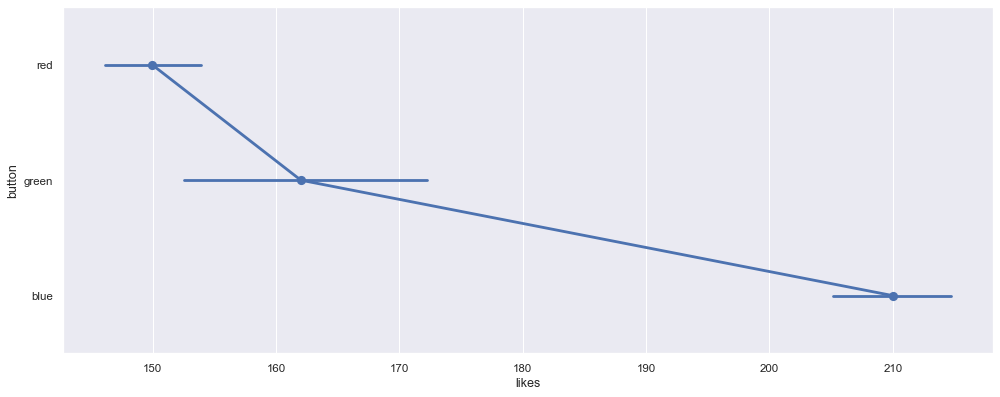

In [27]:
sns.pointplot(y='button',x='likes',data=post_likes);

### Тестируем нормальность:

In [28]:
# через scipy
print(ss.shapiro(red))
print(ss.shapiro(blue))
print(ss.shapiro(green))

ShapiroResult(statistic=0.988104522228241, pvalue=0.515945315361023)
ShapiroResult(statistic=0.9937934279441833, pvalue=0.9309807419776917)
ShapiroResult(statistic=0.988717794418335, pvalue=0.5625351667404175)


In [30]:
# другой вариант
print(ss.normaltest(red))
print(ss.normaltest(blue))
print(ss.normaltest(green))

NormaltestResult(statistic=1.834358590753997, pvalue=0.3996447324611219)
NormaltestResult(statistic=0.4606964500747045, pvalue=0.7942569741771747)
NormaltestResult(statistic=0.6727062715909409, pvalue=0.7143707913703767)


In [32]:
# через pinguin
pg.normality(data=post_likes, dv='likes',group='button', method='normaltest')

W      pval  normal
button                            
red     1.834359  0.399645    True
green   0.672706  0.714371    True
blue    0.460696  0.794257    True

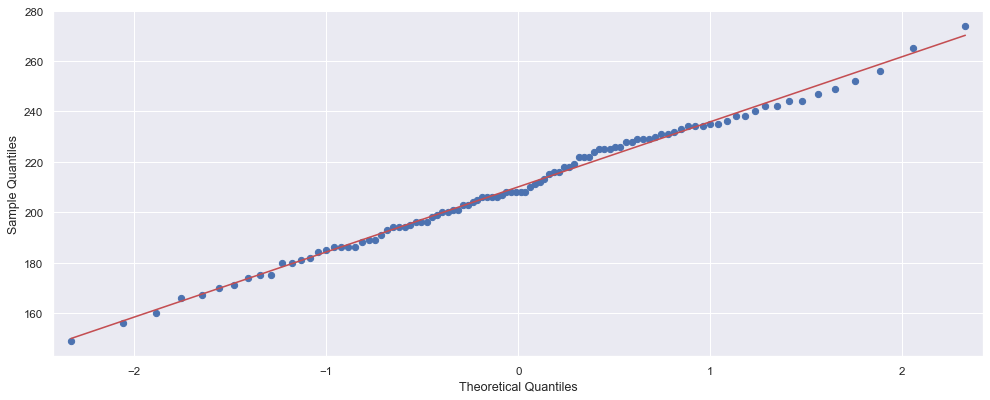

In [35]:
# через графиик
sm.qqplot(blue,line='r');

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

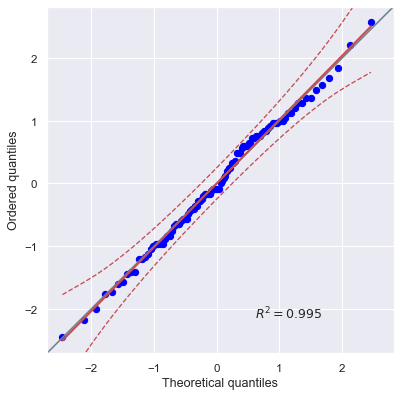

In [33]:
pg.qqplot(blue)

### Тестируем различие в дисперсиях

In [36]:
# через scipy
ss.levene(red,green,blue)

LeveneResult(statistic=35.214282435572876, pvalue=1.8886636651083753e-14)

In [37]:
# через pingouin
pg.homoscedasticity(data=post_likes,dv='likes',group='button')
# дисперсия во всех группах разные

W          pval  equal_var
levene  35.214282  1.888664e-14      False

In [38]:
#anova Уэлча в pinguin
pg.welch_anova(data=post_likes,dv='likes',between='button')

Source  ddof1       ddof2           F         p-unc       np2
0  button      2  182.958104  177.856578  1.255660e-43  0.366728

## Многофакторный ANOVA

Множественные факторы: Данные могут быть разделены на группы в зависимости от различных категорий. Например, возраст и дозировка лекарства могут влиять на экспрессию генов. Можно добавлять больше факторов для анализа.

Двухфакторный дисперсионный анализ: Это метод, который проверяет влияние двух или более номинативных переменных (факторов) на зависимую переменную. Например, возраст (молодые-пожилые) и дозировка лекарства (низкая-высокая) могут влиять на результаты эксперимента.

Общая сумма квадратов: При наличии большего числа факторов общая сумма квадратов включает в себя влияние каждого фактора на зависимую переменную. Это позволяет оценить общее воздействие всех факторов на результаты эксперимента.

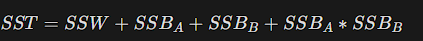

- A и B обозначены межгрупповые суммы квадратов для соответствующих факторов
- $SSB_A * SSB_B$ обозначает их взаимодействие. Взаимодействие факторов – это случай, когда связь зависимой переменной от одного фактора связана со значениями другого (например, противоположный эффект фактора А для групп, которые сформировались по фактору B).

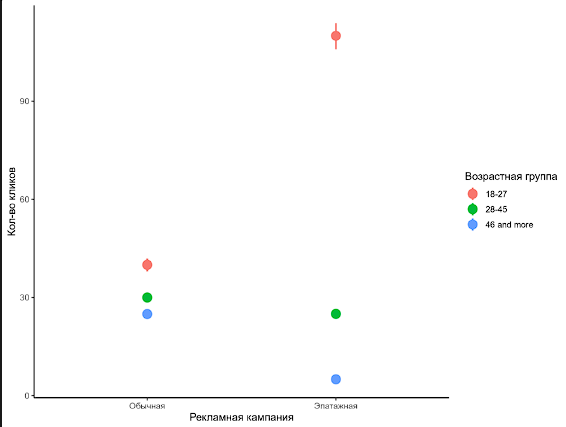

**Внимание:**

1. Как и с однофакторным дисперсионным анализом, мы можем констатировать только общую значимость конкретного фактора, но не можем сказать, какие именно группы различаются и каким образом. Для этого нам опять нужны парные сравнения с поправками.
2. Полученные данные, какие бы они ни были, не означают однозначной каузальной связи между переменными – установить её позволяет только правильно организованный эксперимент.

In [68]:
ads_clicks = pd.read_csv('F:\\карпов\\6 СТАТИСТИКА\\5 Anova\\5 ads_clicks.csv')
ads_clicks.head()

id      ads age_group  clicks
0  S001  classic     18-27      40
1  S002  classic     18-27      22
2  S003  classic     18-27      41
3  S004  classic     18-27      35
4  S005  classic     18-27      39

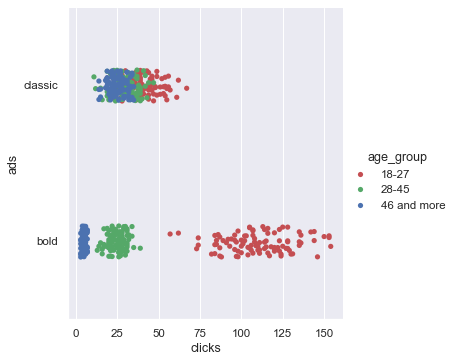

In [73]:
sns.catplot(data=ads_clicks,x = 'clicks',y = 'ads',hue='age_group',palette=['r','g','b']);

In [74]:
#через statmodels, только главные эффекты

# Значком “:” обозначается взаимодействие независимых переменных (НП) - то есть того,
# что влияет на исследуемую нами величину, зависимую переменную (ЗП).

model_main = smf.ols("clicks ~ C(ads) + C(age_group)", data= ads_clicks).fit()
anova_lm(model_main)

df         sum_sq        mean_sq           F         PR(>F)
C(ads)          1.0   33735.001667   33735.001667   68.810244   7.245176e-16
C(age_group)    2.0  400495.163333  200247.581667  408.450696  1.950084e-112
Residual      596.0  292195.753333     490.261331         NaN            NaN

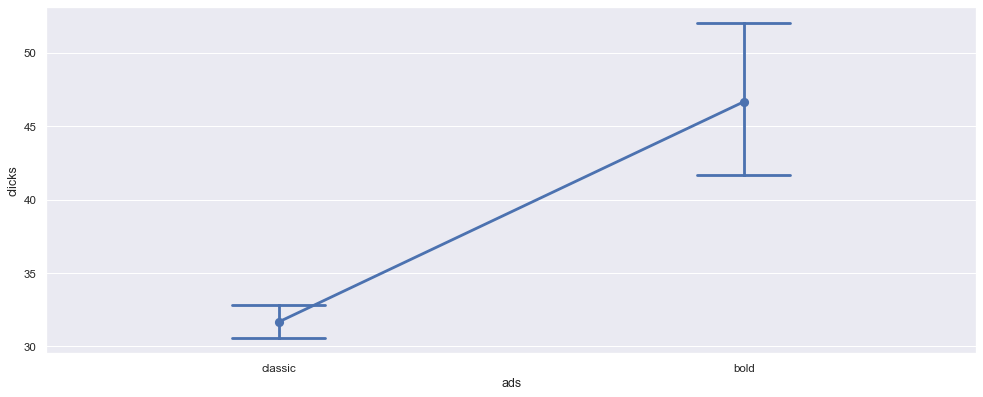

In [77]:
# первый фактор
sns.pointplot(x = 'ads', y = 'clicks', data = ads_clicks, capsize = 0.2);

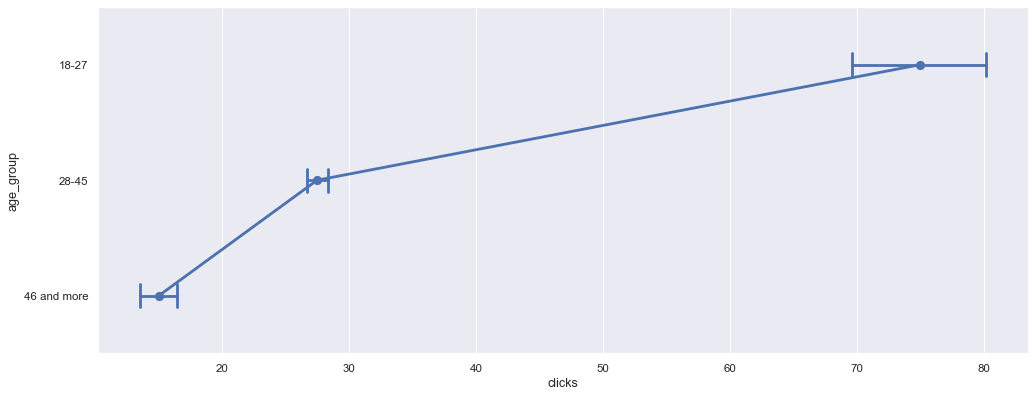

In [90]:
# второй фактор
sns.pointplot(y = 'age_group', x = 'clicks', data = ads_clicks, capsize = 0.2);

In [81]:
# можно просто C(ads) + C(age_group) + C(ads): C(age_group)
model_interact = smf.ols('clicks ~ C(ads)*C(age_group)', data = ads_clicks).fit()
anova_lm(model_interact)

df         sum_sq  ...            F         PR(>F)
C(ads)                 1.0   33735.001667  ...   336.722432   6.446773e-60
C(age_group)           2.0  400495.163333  ...  1998.750536  1.636934e-264
C(ads):C(age_group)    2.0  232685.043333  ...  1161.260853  5.618312e-206
Residual             594.0   59510.710000  ...          NaN            NaN

[4 rows x 5 columns]

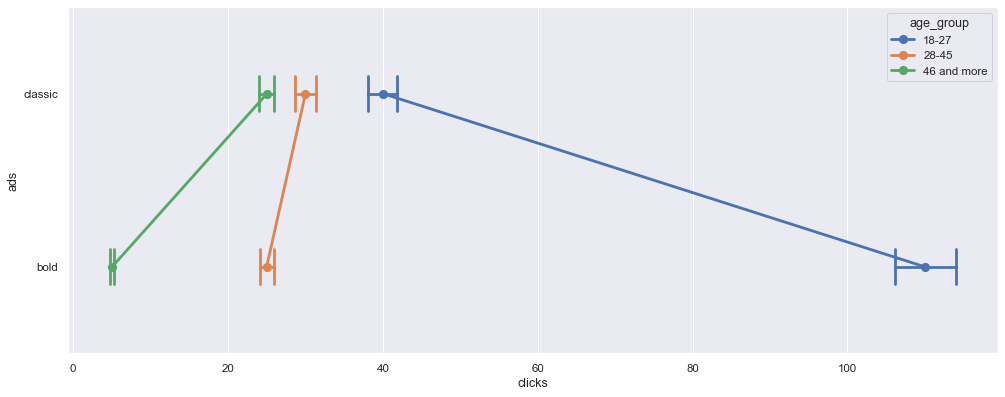

In [84]:
# второй фактор
sns.pointplot(y = 'ads', x = 'clicks', data = ads_clicks, hue = 'age_group', capsize = 0.2);

In [85]:
# теперь pinguin тут эффект не в процентном соотношении
pg.anova(data=ads_clicks, dv= 'clicks', between=['ads','age_group'])

Source             SS   DF  ...            F          p-unc       np2
0              ads   33735.001667    1  ...   336.722432   6.446773e-60  0.361786
1        age_group  400495.163333    2  ...  1998.750536  1.636934e-264  0.870631
2  ads * age_group  232685.043333    2  ...  1161.260853  5.618312e-206  0.796333
3         Residual   59510.710000  594  ...          NaN            NaN       NaN

[4 rows x 7 columns]

In [86]:
# размер эффекта n2 в общем сложении равен 100
pg.anova(data=ads_clicks, dv = 'clicks',between=['ads','age_group'],effsize ='n2')  

Source             SS   DF  ...            F          p-unc        n2
0              ads   33735.001667    1  ...   336.722432   6.446773e-60  0.046440
1        age_group  400495.163333    2  ...  1998.750536  1.636934e-264  0.551323
2  ads * age_group  232685.043333    2  ...  1161.260853  5.618312e-206  0.320315
3         Residual   59510.710000  594  ...          NaN            NaN       NaN

[4 rows x 7 columns]

In [89]:
# тип суммы квадратов для сбалансированные ss_type будет одинаковый
pg.anova(data=ads_clicks, dv='clicks', between=['ads','age_group'], ss_type=3)

Source             SS   DF  ...            F          p-unc       np2
0              ads   33735.001667    1  ...   336.722432   6.446773e-60  0.361786
1        age_group  400495.163333    2  ...  1998.750536  1.636934e-264  0.870631
2  ads * age_group  232685.043333    2  ...  1161.260853  5.618312e-206  0.796333
3         Residual   59510.710000  594  ...          NaN            NaN       NaN

[4 rows x 7 columns]

### Проблема множественных сравнений

In [ ]:
## попарное сравнение
from scipy.special import comb
1 - 0.95**comb(5,2)

# дисперсионный анализ является первым шагом является первый отсвет, есть смысл искать.
# попарное сравнение(уменьшаем число сравнений или делае поправки)
# поправки к уровню значнимости.

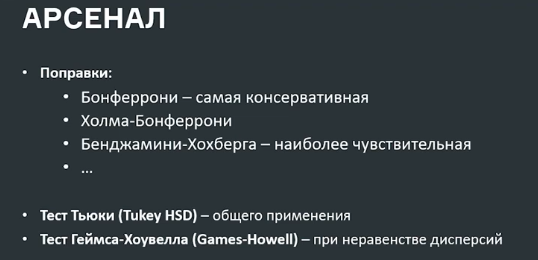

In [63]:
#попарное сравние без поправки
pg.pairwise_tests(data=post_likes,dv='likes',between='button', padjust='holm') 

# Contrast указывается что сравнивается
# A B указывается попарное сравнение
# Paired - являются ли выборки зависимыми или независимыми
# Parametric - выбор между ttest и манна уитни
# T - т статистики
# dof - степени свободы
# alternative - двусторонесть или односторонность проверки гипотезы
# BF10 - альтернативна p-value другая парадигма(почитать)
# hedges - стандартизованный размер эффекта, различие средних / std c каждой группой(почитать)

# green	red пара имеет 0.02 p-val если сделаем поправку, останется ли она значимой? # padjust='bonf','holm'...
# p-corr говорит что различий уже нет при bonf

Contrast      A      B  Paired  ...        p-corr  p-adjust       BF10    hedges
0   button   blue  green   False  ...  5.123733e-15      holm  2.025e+12  1.210357
1   button   blue    red   False  ...  2.385699e-45      holm  1.582e+42  2.644301
2   button  green    red   False  ...  2.619001e-02      holm      1.583  0.315609

[3 rows x 13 columns]

In [64]:
pg.pairwise_tukey(data=post_likes,dv='likes',between='button')

A      B  mean(A)  mean(B)  ...        se          T       p-tukey    hedges
0   blue  green   210.03   162.02  ...  4.846108   9.906919  1.143530e-14  1.210357
1   blue    red   210.03   149.96  ...  4.846108  12.395514  1.143530e-14  2.644301
2  green    red   162.02   149.96  ...  4.846108   2.488595  3.557351e-02  0.315609

[3 rows x 9 columns]

In [65]:
# делает поправку на то, что группы имеют разные дисперсии
pg.pairwise_gameshowell(data=post_likes,dv='likes',between='button')

A      B  mean(A)  ...          df          pval    hedges
0   blue  green   210.03  ...  145.583529  2.242651e-14  1.210357
1   blue    red   210.03  ...  188.902921  0.000000e+00  2.644301
2  green    red   162.02  ...  129.889834  6.830241e-02  0.315609

[3 rows x 10 columns]

In [66]:
# через statsmodels
pairwise_tukeyhsd(post_likes.likes,post_likes.button).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [67]:
MultiComparison(post_likes.likes,post_likes.button).tukeyhsd().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### Дополнительно
1. Как вы могли видеть, помимо различий на оригинальной шкале измерений (на сколько больше просмотров набрали эти посты?), мы можем смотреть на стандартизированные различия. 
- Например, это **d Коэна** и его близкий родственник **g Хеджеса**, которые по сути отражают различия в средних, скорректированные на стандартные отклонения. Для дисперсионного анализа можно встретить величины **эта-квадрат**, **частичная эта-квадрат** и **омега-квадрат** - все измеряют вклад факторов, учтённых в нашем эксперименте. 
- Подробнее об их расчёте и использовании - **[вот тут](https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00863/full)**.

2. Вы также могли заметить величину под названием байес-фактор. Он часто используется как замена p-value и обозначает степень убеждённости в той или иной гипотезе. Подробнее [вот тут](https://easystats.github.io/bayestestR/articles/bayes_factors.html) (осторожно, R).

3. Также стоит ознакомиться с типами сумм квадратов - способами того, как учитывать факторы в многофакторном дисперсионном анализе. Подробнее [тут](http://www.utstat.utoronto.ca/reid/sta442f/2009/typeSS.pdf).

# 6. Корреляция и регрессия

### Понятие корреляции

Коэффициент корреляции Пирсона в своём статистическом смысле обозначает силу и характер взаимосвязи между двумя количественными переменными.
- Положительной (0,4)
- Отрицатеьной (-0,4)
- Без корреляции (0)

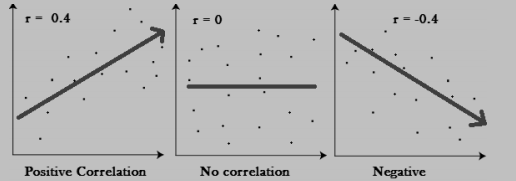

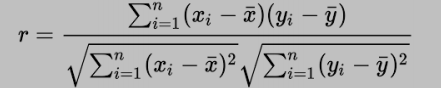

https://rpsychologist.com/d3/correlation/


Дополнительно: существует более современный и продвинутый вариант квартета, называемый [Датазавровой](https://www.research.autodesk.com/publications/same-stats-different-graphs/), также существует [дюжиной](https://www.autodeskresearch.com/publications/samestats), также существует [аналог](https://minepy.readthedocs.io/en/latest/) коэффициента корреляции, способный оценивать крайне нелинейные взаимосвязи в данных.


### Регрессия с одной независимой переменной


Задача одномерной линейной регрессии, по сути, та же, что и у коэффициента корреляции – оценить взаимосвязь между
двумя количественными переменными. 
- Раз личия между ними лежат в технической основе + в линейной регрессии более
чётко выражено, какая переменная независимая (НП), а какая зависимая (ЗП). 
-  Иными словами, значения какой переменной
влияют на другую переменную. НП традиционно лежит на оси Х, а ЗП – на оси Y.



Основное уравнение линейной регрессии:

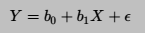

- b0 – свободный член регрессионного уравнения (Intercept), место, где регрессионная прямая пересекает ось Y.
Интерпретация – какое значение принимает зависимая переменная, если независимая переменная равна нулю.
- b1 – угол наклона регрессионной прямой (slope), отражает направление взаимосвязи между НП и ЗП.
- ϵ – ошибка (остатки уравнения регрессии)

Классический метод нахождения оптимальных параметров уравнения линейной регрессии – метод наименьших квадратов (МНК). Он заключается в минимизации суммы квадратов ошибок от регрессионной прямой. Ошибка (остаток) в данном случае – это разница между индивидуальным значением в выборке (y) и соответствующим ему местом на регрессионной прямой (y)

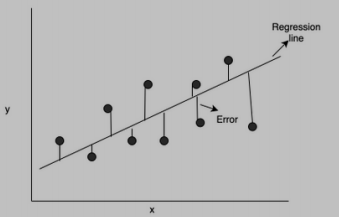

Формулы коэффициентов: 
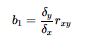
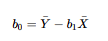

- δ – это стандартное отклонение соответствующей переменной
- rxy - коэффициент корреляции
- X Y -  средние значения соответствующих переменных

**Проверка гипотез**
- $H_{0} - b_{1}$, равен нулю
- $H_{1} - b_{1}$, не равен нулю
- если бы мы повторяли эксперимент бесконечное число раз и **H0 была бы верна**, то
значения **b1** распределились бы нормальным образом вокруг **0**. Соответственно, значимость мы оцениваем с помощью tраспределения, где t-статистика рассчитывается по формуле:

$$ t = \frac{b_{1}}{se}, df = N-2 $$

- se - стандартная ошибка в уравнении линейной регрессии
- df - степени свободы
- N - размер выборки

**коэффициент детерминации ($ R^2$ )** - это квадрат коэффициента корреляции Пирсона и он
отображает, в какой степени дисперсия одной переменной обусловлена влиянием другой переменной.
- Он принимает значения от 0 до 1
-  можно оценивать качество одномерной регрессионной модели – чем больше ($ R^2$ ) , тем
лучше. Также его можно считать по следующей формуле:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$






Где:
- $ SS_{res } $ (сумма квадратов остатков) - это сумма квадратов разностей между реальными значениями зависимой переменной и предсказанными значениями от модели регрессии.
- $ SS_{total} $  (общая сумма квадратов) - это сумма квадратов разностей между реальными значениями зависимой переменной и её средним значением.

*Соответственно, чем меньше $ SS_{res } $ относительно  $ SS_{total} $, тем ближе $R^2$  к единице и тем лучше модель*

**Условия применения**

1. Связь нелинейна и монотонна
2. Остатки распределены нормальным образом
3. Нет выбросов
4. Дисперсия зависимой переменной(ЗП) однородна на всех уровнях НП(гомоскедатичность)

[приложение для наглядности](https://gallery.shinyapps.io/slr_diag/)

In [ ]:
from scipy import stats
import statsmodels.api as sm

# через scipy (только одномерная)
stats.linregress(x, y)

# через statsmodels (один из вариантов)
# Y = одномерный массив с ЗП, X - массив с НП
X = sm.add_constant(X) # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X) # говорим модели, что у нас ЗП, а что НП

results = model.fit() # строим регрессионную прямую
print(results.summary()) # смотрим результат

In [ ]:
import statsmodels.formula.api as smf
# то же самое можно через формулу
results = smf.ols('Y ~ X', data).fit()
print(results.summary())

интересует только это:

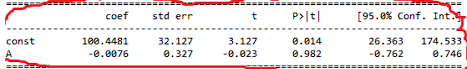

- **const**– это свободный член ($b_{0}$), в других моделях может выглядеть как Intercept
- Ниже располагается НП
- Значения, связанные с $b_{0}$ , интерпретировать не нужно, нас интересует именно угол наклона
- **coef** – значение коэффициента, отрицательные значения означают отрицательную взаимосвязь, положительные -
положительную
- **std err**– стандартная ошибка
- t - t-критерий
- P > [t] - p-val
- 95% доверительный интервал

*Для интерпретации результатов достаточно coef и P > |t|*

Дополнительно:
- В левой верхней части таблицы указаны некоторые формальные характеристики модели (название ЗП, метод, тип ковариации, время создания объекта и т.д.)
- В правой верхней части таблицы находятся показатели качества модели (в первую очередь нам интересны $R^2$ и его скорректированная разновидность, о которой будет в следующем уроке)
- В нижней части таблицы указаны диагностические характеристики модели:
    -  Omnibus и Jarque-Bera - это два разных теста нормальности остатков (prob - их p-значение)
    - skew - коэффициент асимметрии
    - kurtosis - коэффициент эксцесса (насколько вытянутое или плоское распределение остатков)
    -  Durbin-Watson - тест автокорреляции остатков (должен быть между 0 и 4)
    -  Cond. No. - показатель мультиколлинеарности (должен быть меньше 2, об этом в следующем уроке)

- [Примеры диагностики модели](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html)
- [Визуальная диагностика](https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/)
- Использовать regplot для отображения

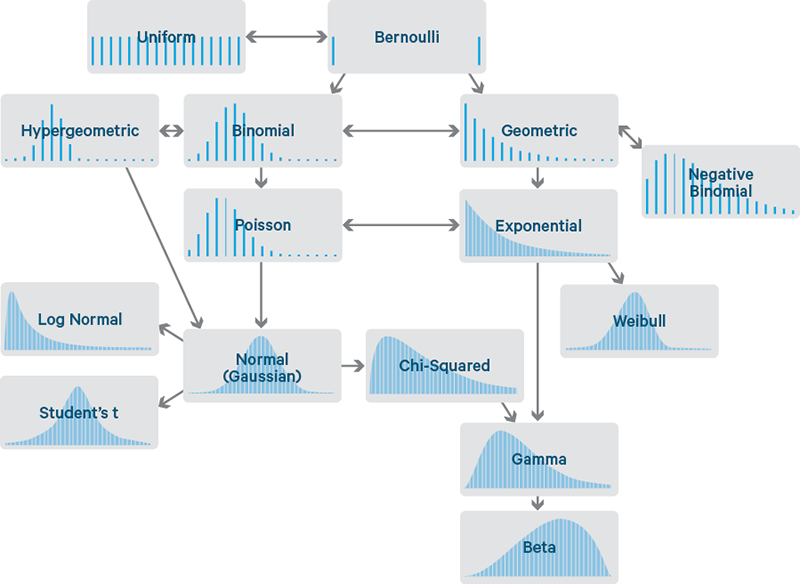

# 7. Bootstrap

**Бутстрэп** - это метод, который используется для оценки статистических показателей (например, среднего значения, дисперсии и доверительных интервалов) путем многократного повторения выборки из имеющихся данных.



**Основная идея** заключается в том, чтобы **создать множество "подвыборок"** из **изначального набора** данных. 
- Каждая подвыборка создается путем случайного выбора данных из исходного набора с возвращением, то есть одни и те же данные могут попасть в выборку несколько раз, а другие вообще не попасть. 
- Затем статистические показатели рассчитываются для каждой из подвыборок, их распределение используется для получения информации о распределении оценки и ее дисперсии.

Основные цели бутстрэпа:
1. **Оценка показателей и их доверительных интервалов:** Позволяет получить оценку статистических характеристик (например, среднего значения, дисперсии) и доверительных интервалов без явного предположения о распределении данных.
2. **Использование для валидации моделей:** Может применяться для оценки стабильности и устойчивости моделей машинного обучения путем повторения процесса обучения на разных подвыборках и анализа различий в результатах.
3. **Построение распределения показателей:** Позволяет оценить форму и характер распределения оценки статистических характеристик.

In [1]:
from scipy.stats import bootstrap
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('F:\\карпов\\6 СТАТИСТИКА\\8 Bootstrap\\8 bootstrap_data.csv')
df.head()

value         group
0  100.719713  experimental
1  106.771525  experimental
2  106.974612  experimental
3  109.249662  experimental
4  116.230142  experimental

In [2]:
df.groupby('group').agg({'value':'count'})

value
group              
control         760
experimental    494

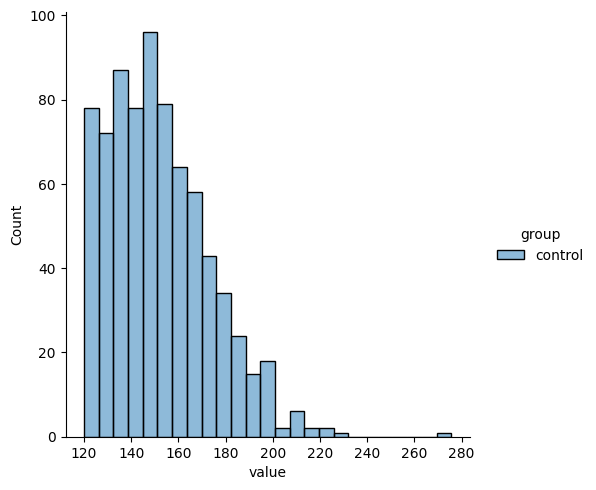

In [3]:
sns.displot(data=df[df.group == 'control'],x='value',hue='group');

In [8]:
control_df = df[df.group == 'control']
exp_df = df[df.group == 'experimental']
control_df.value.median().round(2)


148.83

In [11]:
median_diff = []

for i in range(10000):
    sample_data_control = control_df.sample(frac=1, replace=True)
    sample_median_control = sample_data_control.value.median()
    
    
    sample_data_exp = exp_df.sample(frac=1, replace=True)
    sample_median_exp = sample_data_exp.value.median()
    
    sample_median_diff = sample_median_control - sample_median_exp
    median_diff.append(sample_median_diff)
    
pd.Series(median_diff).quantile(0.975).round(2)

43.94

In [12]:
pd.Series(median_diff).quantile(0.025).round(2)

39.67

### [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html)

Содержит в себе ряд аргументов, но наиболее важные таковы:
- **data** — данные. Принимает их на вход в виде списка (квадратные скобки) или кортежа (круглые скобки), даже если группа только одна —  в случае одной группы данные подаются как **(data, )** ;
- **statistic** —  функция, которая считает нужный нам параметр. Если на вход идёт две или больше групп, то функция также должна принимать на вход два или больше аргументов и возвращать какое-то одно число;
- **n_resamples** —  количество симуляций. По умолчанию 9999 (почти 10000) - можно понизить, если не хватает вычислительных мощностей, или повысить, если хочется увеличить точность;
- **confidence_level** —  уровень значимости, по умолчанию 95%;
- **method** —  алгоритм расчёта доверительного интервала. Метод по умолчанию обычно справляется лучше своих аналогов, но при необходимости можно менять.

In [5]:
bootstrap((control_df.value,), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=146.66616569213227, high=150.79195404716057), bootstrap_distribution=array([150.77666481, 149.98448637, 148.50287355, ..., 149.94358988,
       147.94333894, 148.47206097]), standard_error=0.9983120994232964)

### [pingouin](https://pingouin-stats.org/build/html/generated/pingouin.compute_bootci.html#pingouin.compute_bootci)

В этом пакете есть функция **pingouin.compute_bootci()**, 
- похожая на аналогичную из **scipy** - но с более простым интерфейсом, 
- рядом встроенных метрик (смотрите описание аргумента **func**)  и немного другим набором алгоритмов бутстрапа.

In [6]:
import pingouin as pg

def median_diff(x,y):
    return np.median(x) - np.median(y)

ci = pg.compute_bootci(control_df.value, exp_df.value, func=median_diff, n_boot= 10000)
print(median_diff(control_df.value, exp_df.value).round(2), ci)

41.85 [39.59 43.87]


### [bootstrapped](https://github.com/facebookarchive/bootstrapped)


Библиотека от Facebook/Meta, в большей степени ориентирована на применение бутстрапа в контексте индустрии. Репозиторий содержит в себе [папку с ноутбуками](https://github.com/facebookarchive/bootstrapped/tree/master/examples) для демонстрации всего, что умеет делать эта библиотека.

### [wildboottest](https://s3alfisc.github.io/wildboottest/)

Эта библиотека позволяет оценивать статзначимость коэффициентов регрессионной модели с помощью бутстрапа и работает вместе со **statsmodels**. В частности, пакет реализует алгоритм т.н. “дикого бутстрапа”, более устойчивого к нарушениям гомоскедастичности

Дополнительные ссылки:
- [Старое видео](https://www.youtube.com/watch?v=-zps6hm0nX8) от Толи (тоже на тему бутстрапа)
- [Интерактивный учебник по статистике](https://seeing-theory.brown.edu/frequentist-inference/index.html) с хорошей демонстрацией алгоритма бутстрапа (и других идей статистики и теории вероятностей)
- [Пакет на R](https://github.com/GRousselet/rogme), который демонстрирует возможность сравнения групп между собой сразу по нескольким квантилям с красивой визуализацией —  можете попробовать воспроизвести этот подход в Python 🙂 Отчасти он реализован в [pingouin](https://pingouin-stats.org/build/html/generated/pingouin.plot_shift.html#pingouin.plot_shift).
- [Пуассоновский бутстрап](https://www.youtube.com/watch?v=Zki9VMzxcFU) от Валерия Бабушкина
- [Разновидности](https://influentialpoints.com/Training/bootstrap_confidence_intervals-principles-properties-assumptions.htm) доверительных интервалов в бутстрапе
- [Гайд](https://www.researchgate.net/publication/7994369_Inference_by_Eye_Confidence_Intervals_and_How_to_Read_Pictures_of_Data) по тому, как читать и интерпретировать доверительные интервалы — может послужить хорошим напоминанием или даже уточнить материалы 3 урока статистики

# 8. Хи-квадрат

**Критерий Хи-квадрат** (или критерий согласия Пирсона) используется для проверки того, соответствует ли категориальная случайна величина выбранному распределению. Есть всего два важных условия:
1. Все наблюдения независимы
2. Количество наблюдений в каждой ячейке больше 5


### Критерий Хи-квадрат для одной случайной величины

*Рассмотрим пример с определением того, честная ли у нас игральная кость. Пусть мы сделали 600 бросков игральной кости и записали в массив под номером каждой грани количество раз, которое она выпала*

In [13]:
# резульаты нашей кости
cube = [70, 110, 20, 300, 40, 60]

Для использования критерия для начала необходимо сформулировать предположение:
- $ H_{0} $ гипотеза: Если уровень значимости больше 5% то игральная кость честная
- $ H_{1} $ гипотеза: Если уровень значимости меньше 5% то игральная кость не честная

**Данное предположение может быть описано равномерным распределением.**

- Теперь необходимо посчитать: сколько выпадений каждой грани мы ожидаем при справедливости нашего предположения. 
- Если вероятность получить каждую грань одинакова, то и ожидаем мы в итоге получить одинаковое количество выпадений каждой грани, то есть:

In [14]:
# идеальная кость, где по теории все вероятности равны
trusted_cube = [100, 100, 100, 100, 100, 100]

После того как ожидаемое количество выпадений посчитано, мы можем вручную посчитать статистику критерия Хи-квадрат:

$$ x² = Σᵢ₌₁ⁿ \frac{(Nᵢ - Npᵢ)²}  {Npᵢ} $$

*(Данная величина принадлежит к распределению Хи-квадрат с n-1 степенью свободы.)*

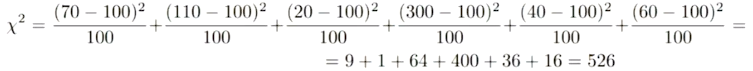

[реализация в python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) + [chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)

In [26]:
# Проверим результат с помощью statsmodels
from scipy.stats import chisquare
s,p = chisquare(cube, trusted_cube)
print(f'statistic: {s} \np-value:   {p.round(3)}')

statistic: 526.0 
p-value:   0.0


По таблице значений ищем значение под количество степеней свободы и уровень значимости, который мы хотим проверить. 
- **Для идеальной кости:** уровень значимости 5% и соответствующее значение квантили - 12,59. 

*Мы видим что значение статистики очень сильно превосходит критическое значение, а значит, что с вероятностью минимум в 95 процентов с костью что то не так.*

### Критерий Хи-квадрат для нескольких величин

#### Таблица сопряженности

- Пусть у нас есть приложение для заказа еды, которое работает в Москве и в Питере. 
- Мы хотим посмотреть на состав нашей аудитории по городам и по операционной системе телефона. 
- На основе наших данных мы можем построить следующую таблицу:

|          | iOS | Android | Всего |
|----------|-----|---------|-------|
| Москва   | 1000| 4000    | 5000  |
| Санкт-Петербург | 700 | 1200 | 1900 |
| Всего    | 1700| 5200    | 6900  |

Такая таблица называется **таблицей сопряженности**. Попробуем ее проанализировать:

*Пусть мы хотим проверить, зависит ли доля пользователей iOS от города. Наша гипотеза: **$H_0$: распределение не зависит от города.***

***Вопрос:** Какие будут ожидаемые значения для нашей нулевой гипотезы?*

**Ответ:** Давайте рассчитаем. 
- $H_0$: утверждает, что доля iOS-пользователей не зависит от города, следовательно, доля iOS-пользователей в отношении ко всем пользователям города должна быть одинаковой. 
    - Доля пользователей iOS всего составляет $1700 / 6900 = 24.64\%$
    - Доля пользователей Android - $5200 / 6900 = 75.36\%$. 

**Следовательно, в Москве должно быть $5000 * 0.2464 = 1232$ пользователя iOS и $5000 * 0.7536 = 3768$ пользователей Android.** 

Проделывая аналогичные вычисления для Питера, получаем таблицу с ожидаемыми значениями:

|          | OS      | Android |
|----------|---------|---------|
| Москва   | 1232    | 3768    |
| Санкт-Петербург | 468.12 | 1431.84 |


Далее мы просто считаем статистику Хи-квадрат по формуле из прошлой секции:

$$\chi^2 = \frac{(1000 -1232)^2}{1232} + \frac{(4000 -3768)^2}{3768} + \frac{(700 -468.12)^2}{468.12} + \frac{(1200 -1431.84)^2}{1431.84} = $$
$$ 48.69 + 14.28 + 114.81 + 37.54  = 215.32 $$

**Вопрос:** Сколько у распределения нашей статистики степеней свободы? 
- Иными словами, сколько независимых случайных величин в таблице сопряженности (*за случайные величины мы считаем только те, что представлены в четырех центральных ячейках таблицы*)?



**Ответ:** Всего одна степень свободы, так как, зная значение любой из четырех центральных ячеек таблицы, мы можем восстановить остальные 3. Более общая формула для расчета степеней свободы выглядит так:

$$ df = (n-1)(m-1) $$

где $n$ - это количество строк, а $m$ - это количество столбцов.

Данное значение не укладывается в 99-процентный доверительный интервал для данного распределения, следовательно, можно сделать вывод, что распределение операционных систем по городам статзначимо различается.

### Реализация в Python

Помимо того, что это можно было сделать формулой одновыборочного критерия хи-квадрат, есть специальная функция `chi2_contingency`. Она принимает на вход табличку сопряжённости (можно посчитать её самостоятельно, а можно воспользоваться функцией [pd.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)). Документацию можно прочесть [тут.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

Ну и также аналоги этого есть в библиотеке `pingouin` ;) Раздел [Contingency](https://pingouin-stats.org/api.html#contingency) как раз посвящён таблицам сопряжённости.

In [32]:
cities = pd.read_csv('F:\\карпов\\6 СТАТИСТИКА\\9 Хи-квадрат\\categorical_analysis\\csv\\cities.csv')
cities.head()

city   ios  android
0           Москва  1000      920
1  Санкт Петербург   430      470
2      Новосибирск   270      280
3             Сочи   250      260
4           Казань   195      203

In [33]:
# Проверим результат с помощью statsmodels
from scipy.stats import chisquare
s,p = chisquare(cities.ios, cities.android)
print(f'statistic: {s} \np-value:   {p.round(3)}')

statistic: 12.726897145089113 
p-value:   0.026


In [38]:
from pingouin import chi2_independence
# Применение теста хи-квадрат
expected, observed, stats = chi2_independence(data=cities, x = 'android',y = 'ios')
stats

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:8073: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scip

test    lambda       chi2   dof      pval    cramer     power
0             pearson  1.000000  30.000000  25.0  0.224289  1.000000  0.207976
1        cressie-read  0.666667  24.860814  25.0  0.470195  0.910326  0.173490
2      log-likelihood  0.000000  21.501114  25.0  0.664362  0.846584  0.152391
3       freeman-tukey -0.500000        NaN  25.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000        inf  25.0  0.000000       inf       NaN
5              neyman -2.000000        NaN  25.0       NaN       NaN       NaN

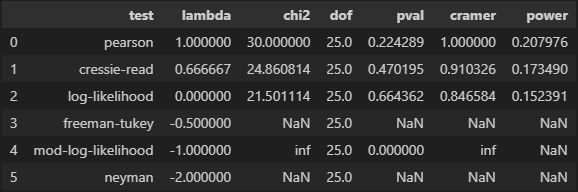

### Кодирование фиктивными переменными

По уроку с регрессионным анализом вы можете помнить, что в минипроекте мы преобразовывали категориальные переменные странной функцией [pd.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). В лекции была демонстрация похожего подхода силами библиотеки [scikit-learn](https://scikit-learn.org/stable/), и там оно носило название [One-hot Encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/). Но что это за подход такой и зачем он вообще нужен? Давайте посмотрим поподробнее.

Представьте себе, что у нас есть данные по кошечкам и собачкам. У нас есть переменная, обозначающая их принадлежность тому или иному виду, и выглядит она так:

| Животное |
|----------|
| "кошка"  |
| "собака" |
| "собака" |
| "кошка"  |

One-hot Encoding сделает из этой переменной вот такое:

| кошка | собака |
|----------|-------------|
|  1           |0           |
|  0           |1           |
|  0           |1           |
|   1           |0           |


Что здесь произошло:

1. На каждую категорию создалось по своей переменной
2. Если данное животное было кошкой, то в столбце "кошка" ставится 1, а в столбце "собака" ставится 0 (и наоборот)

То есть у нас создались новые переменные, обозначающие принадлежность (1) или не-принадлежность (0) объекта к определённой категории! Их называют "фиктивными" или dummy-переменными.

Для большего числа категорий идея та же самая:

| Животное |
|----------|
| "кошка"  |
| "собака" |
| "крыса" |
| "кошка"  |

И её "фиктивная" репрезентация:

| Кошка | Собака | Крыса |
|-------|--------|-------|
| 1     | 0      | 0     |
| 0     | 1      | 0     |
| 0     | 0      | 1     |
| 1     | 0      | 0     |


### Ловушка фиктивных переменных

Давайте ещё раз взглянем на нашу табличку:

| Кошка | Собака |
|-------|--------|
| 1     | 0      |
| 0     | 1      |
| 0     | 1      |
| 1     | 0      |

Какие из этих переменных поместить в регрессию? 
- Первая мысль, которая приходит в голову - поместить обе, нам же нужна информация и о собаках, и о кошках! 
- **Но присмотритесь внимательно:** информация дублируется! Чтобы понять, где у нас кошки, а где собаки, **нам нужна лишь одна** из этих двух переменных: или **кошка** либо **собака**

- можем понять, где какое животное! Соответственно, для модели нам нужна лишь одна из этих переменных. - Более того: если мы включим обе переменные в модель, то она просто сломается! 

***В этом заключается ловушка фиктивных переменных. Почему так происходит?***

Вспомним, в чём суть множественной регрессии: 
- С помощью неё мы по нескольким признакам пытаемся предсказать значение зависимой переменной. 
- При этом регрессия пытается оценить **уникальный** вклад каждой переменной в это предсказание - и **если переменные не коррелируют друг с другом**, ей это сделать легко.
- Если переменные сильно коррелируют, то они ведут себя похожим образом. В результате регрессии становится сложнее оценить, какой вклад принадлежит какой переменной!

`ситуация называется мультиколлинеарностью` - приводит к завышению стандартных ошибок регрессии - и, соответственно, плохой оценке доверительных интервалов и статзначимости.

**В фиктивных переменных** - идеальная отрицательная корреляция.
- в результате возникает идеальная мультиколлинеарность. В такой ситуации регрессия просто неспособна оценить уникальный вклад каждой переменной, ведь они двойники друг друга
- регрессия либо откажется считаться в принципе, либо выдаст нам абсолютно случайные значения коэффициентов. Ни то, ни другое нам не нужно.

`Поэтому стандартной практикой является выкидывание одной из получившихся фиктивных переменных. Это и делала опция drop_first=True в pd.get_dummies() - она выкидывала первую из фиктивных переменных.`

Аналогично работает и для большего числа категорий. Вот так у нас снова будет идеальная мультиколлинеарность:

| Кошка | Собака | Крыса |
|-------|--------|-------|
| 1     | 0      | 0     |
| 0     | 1      | 0     |
| 0     | 0      | 1     |
| 1     | 0      | 0     |

А вот так всё посчитается нормально:

| Собака | Крыса |
|-------|--------|
| 0     | 0      |
| 1     | 0      |
| 0     | 1      |
| 0     | 0      |

### Как интерпретировать фиктивные переменные?

Давайте вспомним стандартную формулу линейной регрессии:
$$\hat{Y} = \beta_0 + \beta_1X_1 + ... \beta_nX_n$$

Перепишем её для ситуации с тремя животными - кошкой, собакой и крысой. Предположим, что мы пытаемся предсказать вредность животного по тому, к какому виду оно относится. Тогда у нас может выйти следующее уравнение:

$$\text{вредность} = 20.15 - 10.8\text{(собака)} + 2.5\text{(крыса)}$$

Что будет, если нам досталась собака? Подставляем соответствующие значения фиктивных переменных:

$$\text{вредность} = 20.15 - 10.8*1 + 2.5*0 = 20.15 - 10.8 = 10.7$$

Обратите внимание, что у нас фактически остался только "собачий" коэффициент, а всё остальное убралось благодаря нулю! В результате мы получили среднее значение вредности для собак. Аналогично для крыс:

$$\text{вредность} = 20.15 - 10.8*0 + 2.5*1 = 20.15 + 2.5 = 22.65$$


**Вопрос:** а что тогда отражает у нас коэффициент $\beta_0$, равный 20.15? А это среднее значение вредности для кошек. Как видите, выкидывание "кошачьей" переменной не привело к потере информации - просто эта информация оказалась в коэффициенте $\beta_0$.



Cоответственно, коэффициенты при фиктивных переменных надо интерпретировать следующим образом:
- как изменится среднее значение переменной относительно "выкинутой" категории. 

В нашем случае средняя вредность собак составляет -10.8 единиц относительно средней вредности кошек, а средняя вредность крыс составляет 2.5 единиц относительно вредности кошек. Если бы мы выкинули не кошек, а собак или крыс - уравнение и его интерпретация изменились бы соответственно.

В принципе, мы можем и не считать коэффициент $\beta_0$, как это было сделано в лекции. Интерпретация будет той же самой, просто в таком случае нам остаётся довольствоваться относительными значениями коэффициентов - посчитать средние для каждой категории у нас не выйдет.

NB! Если вы дочитали до этой части конспекта, то вы могли бы задуматься: а разве это не похоже на дисперсионный анализ? Если бы у нас были только кошки и собаки, не похоже ли это было бы на t-тест?

`Ответ простой: да, похоже! Более того - регрессия с фиктивными переменными и дисперсионный анализ/t-тест математически эквивалентны. Это главная тайна прикладной статистики, часто скрываемая от студентов - но дающая нам невероятную гибкость анализа, когда мы понимаем идущие от неё следствия.`

Есть классический пост, демонстрирующий эту эквивалентность (либо близость к ней) для целого ряда тестов: - и да, хи-квадрат тоже сюда попадает! 
- Изначально эта демонстрация сделана на [R](https://lindeloev.github.io/tests-as-linear/), но 
- есть её [порт на Python](https://www.georgeho.org/tests-as-linear/). 

Рекомендуем взглянуть на оба для полноты взгляда ;)

### Дополнительные материалы


1. [Применение Хи-квадрата в А/Б тестировании](https://towardsdatascience.com/a-b-testing-with-chi-squared-test-to-maximize-conversions-and-ctrs-6599271a2c31) для расчета конверсии

2. [Применение Хи-квадрата в А/Б тестировании](https://medium.com/bukalapak-data/meet-the-engine-of-a-b-testing-chi-square-test-30e8a8ab44c5)

3. [Материалы по непараметрической статистике](https://corporatefinanceinstitute.com/resources/knowledge/other/nonparametric-statistics/)

# 9. AB-тесты

### Суть АБ-тестирования

Пример:
Представим, что в продукте мы хотим поменять систему рекомендаций или дизайн элемента сайта:

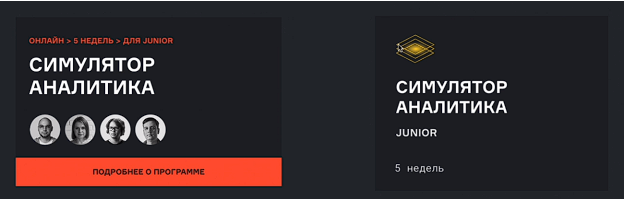

*Изменения, не всегда ведут к лучшему.* Не исключено, что пользователи отреагируют на изменения не так, как мы представляем/планируем и вместо роста, начнем нести убытки.

**Вопрос:** Можем ли мы заранее проверить какой эффект окажет наше изменение?
**Ответ:** Да. С помощью АБ-тестов

Общая суть АБ-тестов, в теории:
- Делим пользователей на две группы:
    - контрольная группа: ничего не меняем 
    - тестовая группа видит изменения

`Если тестовая группа ведет себя лучше, чем котрольная - можно выкаытвать изменения, в остальных случаях не стоит`

В реальности для корректного Аб-теста надо решить несколько важных вопросов:
- выбрать подходящую метрику
- разбить пользователей на группы - две или больше:
- набрать необходимое количество данных:
- применить правильный статистический тест
- сделать выводы, понятные заказчику.

`Внимание!` По сути своей А/Б тестирование - это разновидность большой научной области под названием **эксперементальный дизайн**
- А/Б тесты - это эксперименты, реализованные онлайн, и у них есть _своя специфика_.
- Для погружения в тему можно: читать материалы по тому как проводят эксперементы в науках о жизни и соц. науках. Например: в медицине и психологии. При всех различиях многие базовые идеи в конструировании экспериментов пересекаются между областями

### Выбор метрики

`Самое главное, с чем надо определиться на самых первых этапах А/Б тестирования` - что именно должно улучшиться, чтобы мы сделали вывод об эффективности воздействия. Нужен какой-то показатель, который можно измерить количественно — **метрика**

В простом случае метрики можно делить на две основные категории:
- **Целевые** — то, что нас непосредственно интересует. В бизнесе практически все целевые метрики в итоге **сводятся к прибыли**, но сводиться они могут очень по-разному. Пример: число продаж курса.
- **Прокси-метрики** - показатеи, которые непосредственно **связаны с целевыми метриками**, но сами ими не являются.
    - **Полезны**, если по каким-то причинам **целевая метрика** на данный момент **недоступна**.
    - **Пример:** число пользователей, перешедших на страницу курса (не все из них его купят, но рост ажиотажа может быть хорошим ранним сигналом качества ещё до появления статистики по продажам)

Можно встретить и другие категории метрик, о которых говорят специалисты:
- **guardrail-метрики** (дополнительные метрики, которые не должны измениться в худшую сторону при введении изменения)
- **vanity-метрики** (бесполезные метрики, на которые просто приятно смотреть)

`Более обширную классификацию с примерами можно посмотреть в этой` [книге](https://dmkpress.com/catalog/computer/software_development/978-5-97060-913-2/)

### Деление на группы

Не всякое деление на группы одинаково эффективны.

Пример с продажами:

- *Контрольная группа старые пользователи, тестовая группа это новые пользователи.
Наблюдаем больше продаж в тестовой группе.*
- **Вывод:** `Не факт, что нововведение увеличило продажи. Вероятнее, новые пользователи имеют большую вероятность покупки из-за своего статуса новичков, несмотря на то, что старые пользователи могли уже все приобрести.`

Пример со средним чеком:

- *Контрольная группа из Москвы, тестовая из Саранска.
Вероятно, увидим различия в среднем чеке между группами.*
- **Вывод:** `Различия могут быть обусловлены экономическими различиями между городами, такими как разница в средней зарплате, что может сильно влиять на поведение покупателей, независимо от нововведения.`

#### **Как правильно?** - Рандомизация

Равномерное распределение пользователей:
- **Цель:** обеспечить случайное попадание пользователей в группы с равной вероятностью.
- **Почему?** Это позволяет убедиться, что `единственное различие между группами — использование старой версии или нововведений. Все остальные различия считаются случайными.`

Система сплитования:
- *Алгоритмический подход к распределению пользователей по группам.*
- **Зачем?** Чтобы `исключить субъективность человеческого выбора, который может быть неслучайным и внести систематические различия между группами.`
- **Управление:** Эту систему обычно настраивают инженеры данных в сотрудничестве с аналитиками.

А/А-тестирование:
- *Проверка корректности работы системы сплитования.*
Обе группы являются контрольными.
- **Цель:** убедиться, что с`лучайное распределение пользователей не привело к статистически значимым различиям между группами`.
- **Если обнаружены различия:** Это может указывать на недостатки в системе сплитования или появление неожиданных факторов, влияющих на результаты теста.

**[доп инфа](https://www.unisender.com/ru/blog/sovety/kak-zapustit-aa-test/)**

### Размер выборки

Чем больше собранная нами выборка, тем лучше наши выводы. Однако такая ориентировка не позволяет понять, в какой момент её размер становится достаточным?

Нужен анализ статистической мощности `(power analysis)` - вероятность обнаружить различия, когда они реально есть:
- Чем больше эффект, тем проще обнаружить различия. 
- Он является одним из аргументов для оценки мощности теста. 
- Обычно выражается в стандартизированных единицах (например, Cohen's d для t-теста)

[Посчитать мощность через pingouin](https://pingouin-stats.org/build/html/api.html#power-analysis)

Все местные функции для анализа мощности имеют 4 аргумента. Нам нужно указать 3 из них, в результате посчитается 4ый:
- **Размер выборки** — сколько именно пользователей должно попасть в АБ-тест
- **Вероятность ошибки I рода** — Это вероятность ошибки I рода, т.е., вероятность отклонить нулевую гипотезу, когда она на самом деле верна.(0.05)
- **Мощность** — : Это вероятность обнаружить статистически значимые различия при условии, что они реально существуют. Она рассчитывается с учётом размера выборки, размера эффекта и уровня значимости.
- **Размер эффекта** — как правило, это величина различий. При выборе этого показателя стоит ответить на следующий вопрос: `какое минимальное различие между группами может быть интересно бизнесу?`

нас интересует размер выборки, поэтому для такого расчёта нам `надо задать вероятность ошибки I рода, мощность и размер эффекта`

**Но можно считать и другие показатели** — например:
- Если мы укажем размер выборки, вероятность ошибки I рода и мощность, то мы получим минимальный детектируемый эффект 
    - (minimum detectable effect, MDE) — то есть самый маленький размер эффекта, который можно получить с таким размером выборки, уровнем значимости и мощностью.

- [Вебинар Толи](https://www.youtube.com/watch?v=2nP_gcut7SU)
- [Выступление Толи](https://www.youtube.com/watch?v=lJY6eMh10iE)
- Статьи: [раз](https://medium.com/statistics-experiments/когда-останавливать-a-b-тест-часть-1-mde-7d39b668b488) и [два](https://medium.com/statistics-experiments/когда-останавливать-a-b-тест-часть-2-monte-carlo-a342ba5b552c) 

### Выбор теста и выводы

`1. Выбор:`
- если метрика похожа на конверсию — используем хи-квадрат (см. урок
“Аналитика категориальных переменных”)
- если величина непрерывная или дискретная — используем t-тест (если не
уверены - Манна-Уитни, но с этим [поаккуратнее](https://habr.com/ru/company/avito/blog/709596/))

`2. Дополним конспект двумя дополнительными эвристиками:`
- если групп больше 2 — используем дисперсионный анализ
- если хотим сравнить что-то хитрее среднего — используем бутстрап

`3. Опираться на:`
- вот этот [гайд от VK](https://vkteam.medium.com/practitioners-guide-to-statistical-tests-ed2d580ef04f)
- деревья выбора метода в [pingouin](https://pingouin-stats.org/build/html/guidelines.html)
- всё, что найдёте по запросу “схема выбора статистического теста”, “how to choose statistical test” и любым подобным — в интернете огромное количество подобных схем



**`Cамый важный результат работы аналитика — это выводы.`** Причём для выводов недостаточно просто привести ноутбук с вычислениями — большей части ваших работодателей такой формат не будет понятен.

`Важно учиться объяснять результаты своей работы простыми словами и давать интерпретацию этим результатам.`

### Выбор метода

#### 1. Смотрим на тип данных (если количественные – идем по левой ветке, две категориальных – правая, хи-квадрат)

#### 2. Какой у нас тип исследовательского вопроса? Если поиск различий (differences), то идем направо


#### 3. Что сравниваем? Средние (means) – направо, дисперсии – лево

#### 4. Сколько групп для сравнения? Две – налево, больше двух – направо

#### 5. Проверяем, удовлетворяются ли параметрические условия. Если да – налево, нет – право.

#### 6. Также проверяем, помогает ли трансформация переменной (напр. взять логарифм) – если да, то можем вернуться к параметрическим тестам, нет – выбираем непараметрические.

#### `блок-схема для выбора часто используемых статистических тестов`

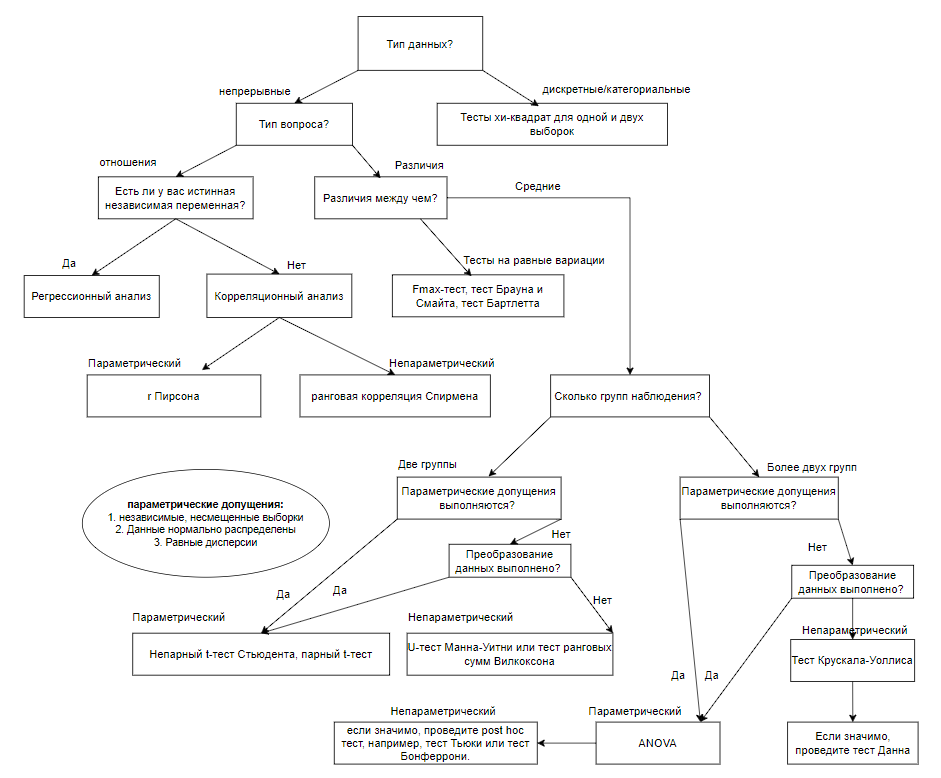

`Еще одна картинка, где более явно прописаны типы переменных для каждого
теста. Слева – тип предиктора, сверху – зависимой переменной. Например, если у
нас есть одна переменная с двумя кат егориями, и при этом удовлетворяются
параметрические условия, то использует ся t-test.
`

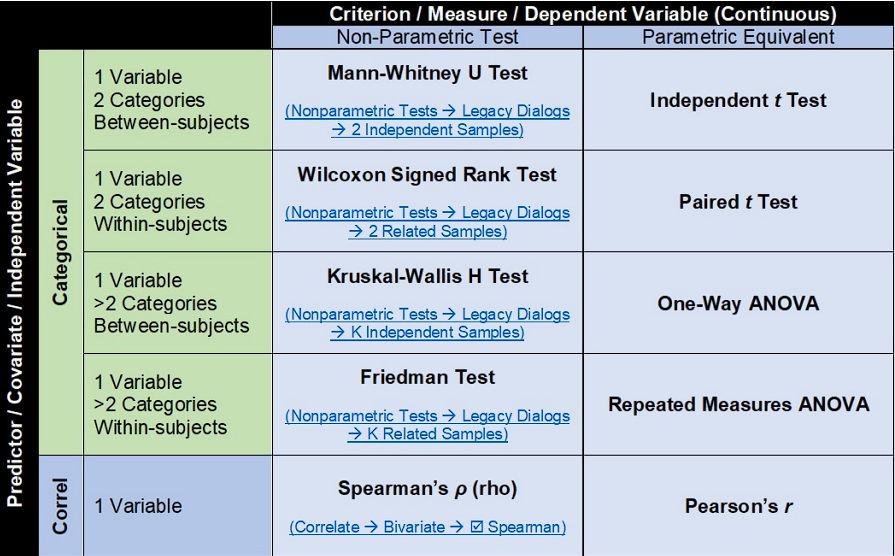

### Дополнительные ссылки

- [Интервью с Никитой Маршалкиным](https://www.youtube.com/watch?v=gljfGAkgX_o) - `полезные ссылки в описании`
- [Книжка про причинно-следственный вывод](https://matheusfacure.github.io/python-causality-handbook/landing-page.html) - первые две главы объясняют, почему рандомизация в экспериментах вообще эффективна, остальные посвящены случаям, когда А/Б-тесты невозможны. Про случаи с невозможностью А/Б-тестов также можно почитать [вот это](https://theeffectbook.net/)
- Для более глубокого и математизированного погружения в вопрос: [Как обосновать причинно-следственный вывод](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)
- [Подходы к работе с дисперсией](https://www.youtube.com/watch?v=KvIJ8FCJzr4&t=958s)
- [туториал от Microsoft по A/B-тестам ](https://exp-platform.com/2017abtestingtutorial/)

`2 этап ссылок`

- О хи-квадрате – первый модуль в [основах статистики II](https://stepik.org/course/524/syllabus)
- Как устроено [A/B-тестирование в Авито](https://habr.com/ru/company/avito/blog/454164/)
- [Методы сокращения дисперсии](https://www.youtube.com/watch?v=KvIJ8FCJzr4&feature=youtu.be), и зачем это нужно
- [Статистика в АБ мифы и реальность](https://www.youtube.com/watch?v=IFAaTKVKH1A)